# Preview - King's County Housing

- Goal of this notebook is to paste a template version of the workflow from the ADMIN_Comparing_Datasets notebook.
 
**The code will:**
- Create 4 preprocessing pipelines (one with scaling and one without)
    - `preprocessor`
        - Clone: `preprocessor_cln`
    - `preprocessor_scale`
        - Clone: `preprocessor_scale_cln`    
    
- Create 4 Versions of the X/y data.
    - **All Data/Rows:**
        - Starting Vars:
            - df,X,y, X_train, X_test,y_train,y_test
        - **Unscaled**
            - Without a  constant:
                - X_train_df, X_test_df, y_train,y_test
            - With a constant:
                - X_train_df_cnst, X_test_df_cnst, y_train (same), y_test (same)
        - **Scaled:**
            - Without a  constant:
                - X_train_df_scaled, X_test_df_scaled, y_train (same), y_test (same)
            - With a constant:
                - X_train_df_scaled_cnst, X_test_df_scaled_cnst, y_train (same), y_test (same)

    - **Cleaned/Outliers Removed**
        - Starting Vars:
            - df_clean,X_cln,y_cln, X_train_cln, X_test_cln,y_train_cln,y_test_cln
        - **Unscaled**
            - Without a  constant:
                - X_train_df_cln, X_test_df_cln, y_train,y_test
            - With a constant:
                - X_train_df_cln_cnst, X_test_df_cln_cnst, y_train_cln (same), y_test_cln (same)
        - **Scaled:**
            - Without a  constant:
                - X_train_df_cln_scaled, X_test_df_cln_scaled, y_train_cln (same), y_test_cln (same)
            - With a constant:
                - X_train_df_scaled_cln_cnst, X_test_df_cln_scaled_cnst, y_train_cln (same), y_test_cln (same)

# Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
## Customization Options
# pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option("display.max_columns",100)
plt.style.use(['fivethirtyeight','seaborn-talk'])
mpl.rcParams['figure.facecolor']='white'

## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics

from sklearn.base import clone

## fixing random for lesson generation
np.random.seed(321)

##import statsmodels correctly
import statsmodels.api as sm
from scipy import stats

## Customized Options
# pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
# plt.style.use('seaborn-talk')

In [2]:
## Adding folder above to path
import os, sys
sys.path.append(os.path.abspath('../'))

## Load stack_functions with autoreload turned on
%load_ext autoreload
%autoreload 2
from CODE import stack_functions as sf

def show_code(function):
    import inspect 
    from IPython.display import display,Markdown, display_markdown
    code = inspect.getsource(function)
    md_txt = f"```python\n{code}\n```"
    return display(Markdown(md_txt))
    

## Preliminary Checks and Dtype Conversion

- Change:
    - `FILE`: url or filepath to load
    - `DROP_COLS`: list of columns to drop from df
    - `CONVERT_TO_STR_COLS`: numeric cols to convert to str
    - `CONVERT_TO_NUM_COLS`: str cols to convert to numeric (uses pd.to_numeric)

In [3]:
## Load in data
FILE = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv"


df = pd.read_csv(FILE)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [4]:
from pandas_profiling import ProfileReport
# ProfileReport(df)

In [5]:
## Drop unwanted columns
DROP_COLS = ['id','date']
df = df.drop(columns=DROP_COLS)

In [6]:
## Convert all categories to strings
CONVERT_TO_STR_COLS = ['zipcode']
df[CONVERT_TO_STR_COLS] = df[CONVERT_TO_STR_COLS].astype(str)

CONVERT_TO_NUM_COLS = []
for col in CONVERT_TO_NUM_COLS:
    df[col] = pd.to_numeric(df[col])

In [7]:
## final info before X/y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  object 
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

## Full Dataset Preprocessing

In [8]:
## Make x and y variables
target = 'price'
drop_cols_model = []

y = df[target].copy()
X = df.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
8306          3       2.50         2250      9235     2.0           0     0   
18426         4       2.75         1590      6000     1.5           0     0   
11280         4       1.75         2040      6000     1.0           0     0   
13891         3       1.00         1200      9800     1.0           0     0   
6498          3       2.25         1570      8767     1.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
8306           3      8        2250              0      1985             0   
18426          4      8        1590              0      1925             0   
11280          5      7        1020           1020      1943             0   
13891          4      7        1200              0      1971             0   
6498           3      7        1180            390      1990             0   

      zipcode      lat     long  sqft_living15  sqft_lot15  
8306    98052  47.7268 -122.105           2290        8187  
18426   98112  47.6401 -122.299           1590        4000  
11280   98136  47.5507 -122.383           1440        6000  
13891   98072  47.7412 -122.109           1220       10220  
6498    98038  47.3568 -122.038           1570        7434

### Unscaled

In [9]:
## cat selector
cat_sel = make_column_selector(dtype_include='object')
cat_cols = cat_sel(X)

# num selectorr
num_sel = make_column_selector(dtype_include='number')
num_cols = num_sel(X)

## make pipelines & column transformer - raw numeric
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

num_pipe_raw = make_pipeline(SimpleImputer(strategy='mean'))
preprocessor = make_column_transformer((num_pipe_raw, num_sel),
                                       (cat_pipe,cat_sel), verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x14f146820>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x14f1467c0>)],
                  verbose_feature_names_out=False)

In [10]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.fit_transform(X_train), 
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                         columns=preprocessor.get_feature_names_out(), 
                         index=X_test.index)


## Prepare X vars with constant
X_train_df_cnst = sm.add_constant(X_train_df, prepend=False, has_constant='add')
X_test_df_cnst = sm.add_constant(X_test_df, prepend=False, has_constant='add')

In [11]:
X_train_df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  16209.000000  16209.000000  16209.000000  1.620900e+04  16209.000000   
mean       3.370967      2.115245   2079.601703  1.520523e+04      1.497964   
std        0.938522      0.771886    917.317141  4.212858e+04      0.541351   
min        0.000000      0.000000    290.000000  5.720000e+02      1.000000   
25%        3.000000      1.500000   1420.000000  5.030000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.601000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.065900e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  16209.000000  16209.000000  16209.000000  16209.000000  16209.000000   
mean       0.007712      0.236597      3.410328      7.661793   1791.044481   
std        0.087480      0.769035      0.654447      1.178167    830.002388   
min        0.000000      0.000000      1.000000      1.000000    290.000000   
25%        0.000000      0.000000      3.000000      7.000000   1190.000000   
50%        0.000000      0.000000      3.000000      7.000000   1560.000000   
75%        0.000000      0.000000      4.000000      8.000000   2220.000000   
max        1.000000      4.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   16209.000000  16209.000000  16209.000000  16209.000000  16209.000000   
mean      288.557221   1971.031402     85.590721     47.560254   -122.213759   
std       440.554349     29.492575    404.410880      0.138929      0.141138   
min         0.000000   1900.000000      0.000000     47.155900   -122.519000   
25%         0.000000   1951.000000      0.000000     47.469800   -122.328000   
50%         0.000000   1975.000000      0.000000     47.572800   -122.230000   
75%       550.000000   1997.000000      0.000000     47.678400   -122.124000   
max      4820.000000   2015.000000   2015.000000     47.777600   -121.315000   

       sqft_living15     sqft_lot15  zipcode_98001  zipcode_98002  \
count   16209.000000   16209.000000   16209.000000   16209.000000   
mean     1988.143932   12864.277747       0.017459       0.009501   
std       687.198385   28019.873424       0.130980       0.097011   
min       460.000000     651.000000       0.000000       0.000000   
25%      1490.000000    5100.000000       0.000000       0.000000   
50%      1840.000000    7602.000000       0.000000       0.000000   
75%      2370.000000   10091.000000       0.000000       0.000000   
max      6210.000000  871200.000000       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   16209.000000   16209.000000   16209.000000   16209.000000   
mean        0.012401       0.015300       0.007465       0.022518   
std         0.110668       0.122748       0.086080       0.148367   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   16209.000000   16209.000000   16209.000000   16209.000000   
mean        0.006478       0.012277       0.004936       0.008822   
std         0.080227       0.110123       0.070082       0.093515   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   



> The cell below should be updated for each dataset- only separating high cardinality OHE features (e.g. zipcode)

In [12]:
## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_df.columns if c.startswith('zipcode')]
nonohe_cols = X_train_df.drop(columns=[*ohe_cols]).columns.tolist()

### Scaled

In [13]:
## make pipelines & column transformer - scaled
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe_scale = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
preprocessor_scale = make_column_transformer((num_pipe_scale, num_sel),
                                       (cat_pipe,cat_sel), verbose_feature_names_out=False)
preprocessor_scale

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x14f146820>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x14f1467c0>)],
                  verbose_feature_names_out=False)

In [14]:
# ### PREP ALL SCALED X VARS


# Prepare X_train_scaled_df & X_test_scaled_df
X_train_scaled_df = pd.DataFrame( preprocessor_scale.fit_transform(X_train), 
                          columns=preprocessor_scale.get_feature_names_out(),
                         index=X_train.index)


X_test_scaled_df = pd.DataFrame( preprocessor_scale.transform(X_test),
                         columns=preprocessor_scale.get_feature_names_out(), 
                         index=X_test.index)


## Save vers with constant
X_train_scaled_df_cnst = sm.add_constant(X_train_scaled_df, prepend=False, has_constant='add')
X_test_scaled_df_cnst = sm.add_constant(X_test_scaled_df, prepend=False, has_constant='add')


## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_df.columns if c.startswith('zipcode')]
nonohe_cols = X_train_df.drop(columns=[*ohe_cols]).columns.tolist()


X_test_scaled_df.head()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
16660 -1.460818  -0.473199    -0.032271 -0.078458 -0.919883   -0.088157   
2905  -0.395279  -0.797092    -0.424732 -0.130491  0.003761   -0.088157   
7700  -0.395279   0.822369     1.515769 -0.132817  2.774691   11.343368   
16733  0.670259   0.498477     0.491010 -0.167023  0.927404   -0.088157   
15334 -0.395279   1.146261     1.799213  8.738346  0.003761   -0.088157   

           view  condition     grade  sqft_above  sqft_basement  yr_built  \
16660 -0.307664   0.901051  0.287071    0.312003      -0.655007 -0.713130   
2905  -0.307664   2.429105 -0.561731   -0.121744      -0.655007 -0.577499   
7700   4.893821  -0.627003  2.833479    2.022895      -0.655007  0.609277   
16733 -0.307664  -0.627003  0.287071    0.890333      -0.655007  0.744909   
15334 -0.307664   0.901051  1.135874    0.528877       2.749899  0.643185   

       yr_renovated       lat      long  sqft_living15  sqft_lot15  \
16660     -0.211650  0.436539 -0.037138       1.443377   -0.034415   
2905      -0.211650  0.093189  0.550956      -0.608495   -0.107294   
7700       4.733968  1.153473 -0.327642       3.116891   -0.035307   
16733     -0.211650 -2.136792 -0.696087       0.337404   -0.173142   
15334     -0.211650 -0.968535  1.302016      -0.070060    7.314167   

       zipcode_98001  zipcode_98002  zipcode_98003  zipcode_98004  \
16660            0.0            0.0            0.0            1.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            1.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            1.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98010  zipcode_98011  zipcode_98014  zipcode_98019  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98028  zipcode_98029  zipcode_98030  zipcode_98031  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98032  zipcode_98033  zipcode_98034  zipcode_98038  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            1.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            1.0   

       zipcode_98039  zipcode_98040  zipcode_98042  zipcode_98045  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0         

In [15]:
X_train_scaled_df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04   
mean   1.946332e-16 -2.716755e-16 -7.276827e-17 -2.191815e-17 -7.890536e-18   
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min   -3.591895e+00 -2.740444e+00 -1.950969e+00 -3.473574e-01 -9.198826e-01   
25%   -3.952793e-01 -7.970916e-01 -7.190774e-01 -2.415353e-01 -9.198826e-01   
50%   -3.952793e-01  1.745848e-01 -1.848945e-01 -1.805060e-01  3.760903e-03   
75%    6.702591e-01  4.984770e-01  5.128137e-01 -1.079164e-01  9.274044e-01   
max    3.157087e+01  7.624104e+00  1.249377e+01  3.883834e+01  3.698335e+00   

         waterfront          view     condition         grade    sqft_above  \
count  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04   
mean   1.315089e-17 -6.049411e-17 -1.773179e-16  2.695933e-16 -4.471304e-17   
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min   -8.815724e-02 -3.076638e-01 -3.683110e+00 -5.654546e+00 -1.808538e+00   
25%   -8.815724e-02 -3.076638e-01 -6.270026e-01 -5.617314e-01 -7.241702e-01   
50%   -8.815724e-02 -3.076638e-01 -6.270026e-01 -5.617314e-01 -2.783746e-01   
75%   -8.815724e-02 -3.076638e-01  9.010510e-01  2.870711e-01  5.168283e-01   
max    1.134337e+01  4.893821e+00  2.429105e+00  4.531084e+00  9.179721e+00   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04   
mean   -8.548080e-17 -2.006388e-15  9.994678e-17 -5.685438e-14  5.796124e-14   
std     1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min    -6.550069e-01 -2.408525e+00 -2.116495e-01 -2.910590e+00 -2.162779e+00   
25%    -6.550069e-01 -6.792225e-01 -2.116495e-01 -6.510979e-01 -8.094541e-01   
50%    -6.550069e-01  1.345668e-01 -2.116495e-01  9.030926e-02 -1.150780e-01   
75%     5.934588e-01  8.805402e-01 -2.116495e-01  8.504316e-01  6.359818e-01   
max     1.028609e+01  1.490882e+00  4.771061e+00  1.564486e+00  6.368127e+00   

       sqft_living15    sqft_lot15  zipcode_98001  zipcode_98002  \
count   1.620900e+04  1.620900e+04   16209.000000   16209.000000   
mean   -1.258102e-16  2.674015e-17       0.017459       0.009501   
std     1.000031e+00  1.000031e+00       0.130980       0.097011   
min    -2.223799e+00 -4.358926e-01       0.000000       0.000000   
25%    -7.249134e-01 -2.771075e-01       0.000000       0.000000   
50%    -2.155833e-01 -1.878110e-01       0.000000       0.000000   
75%     5.556879e-01 -9.897844e-02       0.000000       0.000000   
max     6.143766e+00  3.063405e+01       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   16209.000000   16209.000000   16209.000000   16209.000000   
mean        0.012401       0.015300       0.007465       0.022518   
std         0.110668       0.122748       0.086080       0.148367   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   16209.000000   16209.000000   16209.000000   16209.000000   
mean        0.006478       0.012277       0.004936       0.008822   
std         0.080227       0.110123       0.070082       0.093515   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zi

## Cleaned Dataset Preprocessing

### Remove Outliers

In [16]:
show_code(sf.remove_outliers)

```python
def remove_outliers(df_,method='iqr', subset=None, verbose=2):
    """Returns a copy of the input df with outleirs removed from all
    columns using the selected method (either 'iqr' or 'z'/'zscore')
    
    Arguments:
        df_ (Frame): Dataframe to copy and remove outleirs from
        method (str): Method of outlier removal. Options are 'iqr' or 'z' (default is 'iqr')
        subset (list or None): List of column names to remove outliers from. If None, uses all numeric columns.
        verbose (bool, int): If verbose==1, print only overall summary. If verbose==2, print detailed summary"""
    import pandas as pd
    ## Make a cope of input dataframe  
    df = df_.copy()
    
    ## Set verbose_func for calls to outleir funcs
    if verbose==2:
        verbose_func = True
    else:
        verbose_func=False
        
    ## Set outlier removal function and name
    if method.lower()=='iqr':
        find_outlier_func = find_outliers_IQR
        method_name = "IQR rule"
    elif 'z' in method.lower():
        find_outlier_func = find_outliers_Z
        method_name = 'Z_score rule'
    else:
        raise Exception('[!] Method must be either "iqr" or "z".')
        
    ## Set list of cols to remove outliers from
    if subset is None:
        col_list = df.select_dtypes('number').columns
    elif isinstance(subset,str):
        col_list = [subset]
    elif isinstance(susbet, list):
        col_list = subset
    else:
        raise Exception("[!] subset must be None, a single string, or a list of strings.")

    

    
    ## Empty dict for both types of outliers
    outliers = {}

    ## Use both functions to see the comparison for # of outliers
    for col in col_list:
        idx_outliers = find_outlier_func(df[col],verbose=verbose_func)
        outliers[col] = idx_outliers

    
    ## Getting final df of all outliers to get 1 final T/F index
    outliers_combined = pd.DataFrame(outliers).any(axis=1)
    
    if verbose:
        n = len(outliers_combined)
        print(f"\n[i] Overall, {outliers_combined.sum():,} rows out of {n:,}({outliers_combined.sum()/n*100:.2f}%) were removed as outliers using {method_name}.")
    
    
    # remove_outliers 
    df_clean = df[~outliers_combined].copy()
    return df_clean

```

In [17]:
df_clean_iqr = sf.remove_outliers(df,verbose=2)
df_clean_iqr

- 1,159 outliers found in price out of 21,613 rows (5.36%) using IQR.
- 546 outliers found in bedrooms out of 21,613 rows (2.53%) using IQR.
- 571 outliers found in bathrooms out of 21,613 rows (2.64%) using IQR.
- 572 outliers found in sqft_living out of 21,613 rows (2.65%) using IQR.
- 2,425 outliers found in sqft_lot out of 21,613 rows (11.22%) using IQR.
- 0 outliers found in floors out of 21,613 rows (0.00%) using IQR.
- 163 outliers found in waterfront out of 21,613 rows (0.75%) using IQR.
- 2,124 outliers found in view out of 21,613 rows (9.83%) using IQR.
- 30 outliers found in condition out of 21,613 rows (0.14%) using IQR.
- 1,911 outliers found in grade out of 21,613 rows (8.84%) using IQR.
- 611 outliers found in sqft_above out of 21,613 rows (2.83%) using IQR.
- 496 outliers found in sqft_basement out of 21,613 rows (2.29%) using IQR.
- 0 outliers found in yr_built out of 21,613 rows (0.00%) using IQR.
- 914 outliers found in yr_renovated out of 21,613 rows (4.23%) using I

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
6      257500.0         3       2.25         1715      6819     2.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
6               0     0          3      7        1715              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
0          1955             0   98178  47.5112 -122.257           1340   
2          1933             0   98028  47.7379 -122.233           2720   
3          1965             0   98136  47.5208 -122.393           1360   
4          1987             0   98074  47.6168 -122.045           1800   
6          1995             0   98003  47.3097 -122.327           2238   
...         ...           ...     ...      ...      ...            ...   
21608      2009             0   98103  47.6993 -122.346           1530   
21609      2014             0   98146  47.5107 -122.362           1830   
21610      2009             0   98144  47.5944 -122.299           1020   
21611      2004             0   98027  47.5345 -122.069           1410   
21612      2008             0   98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
2            8062  
3            5000  
4            7503  
6            6819  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[14931 rows x 19 columns]

In [18]:
df_clean_z = sf.remove_outliers(df,method='z')
df_clean_z

- 406 outliers found in price out of 21,613 rows (1.88%) using Z-scores.
- 75 outliers found in bedrooms out of 21,613 rows (0.35%) using Z-scores.
- 187 outliers found in bathrooms out of 21,613 rows (0.87%) using Z-scores.
- 248 outliers found in sqft_living out of 21,613 rows (1.15%) using Z-scores.
- 347 outliers found in sqft_lot out of 21,613 rows (1.61%) using Z-scores.
- 8 outliers found in floors out of 21,613 rows (0.04%) using Z-scores.
- 163 outliers found in waterfront out of 21,613 rows (0.75%) using Z-scores.
- 829 outliers found in view out of 21,613 rows (3.84%) using Z-scores.
- 30 outliers found in condition out of 21,613 rows (0.14%) using Z-scores.
- 136 outliers found in grade out of 21,613 rows (0.63%) using Z-scores.
- 254 outliers found in sqft_above out of 21,613 rows (1.18%) using Z-scores.
- 247 outliers found in sqft_basement out of 21,613 rows (1.14%) using Z-scores.
- 0 outliers found in yr_built out of 21,613 rows (0.00%) using Z-scores.
- 914 outliers f

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
6      257500.0         3       2.25         1715      6819     2.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
6               0     0          3      7        1715              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
0          1955             0   98178  47.5112 -122.257           1340   
2          1933             0   98028  47.7379 -122.233           2720   
3          1965             0   98136  47.5208 -122.393           1360   
4          1987             0   98074  47.6168 -122.045           1800   
6          1995             0   98003  47.3097 -122.327           2238   
...         ...           ...     ...      ...      ...            ...   
21608      2009             0   98103  47.6993 -122.346           1530   
21609      2014             0   98146  47.5107 -122.362           1830   
21610      2009             0   98144  47.5944 -122.299           1020   
21611      2004             0   98027  47.5345 -122.069           1410   
21612      2008             0   98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
2            8062  
3            5000  
4            7503  
6            6819  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[18702 rows x 19 columns]

In [19]:
## Make x and y variables
# target = 'price'
# drop_cols_model = []

y_cln = df_clean_z[target].copy()
X_cln = df_clean_z.drop(columns=[target,*drop_cols_model]).copy()

X_train_cln, X_test_cln, y_train_cln, y_test_cln = train_test_split(X_cln,y_cln, random_state=321)
X_train_cln.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
6406          3       1.75         1750      9623     1.0           0     0   
16601         3       2.50         3180      7904     1.0           0     0   
16481         3       1.50          880      6600     1.0           0     0   
13797         4       2.25         2620     33578     2.0           0     0   
9833          2       1.00          820      2723     1.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
6406           3      7        1150            600      1962             0   
16601          3      8        1810           1370      2006             0   
16481          5      6         880              0      1945             0   
13797          3      7        2620              0      1977             0   
9833           3      7         820              0      1921             0   

      zipcode      lat     long  sqft_living15  sqft_lot15  
6406    98198  47.3997 -122.313           1820        9623  
16601   98056  47.4890 -122.181           1950        7800  
16481   98178  47.5002 -122.247           1020        6600  
13797   98075  47.5921 -122.013           2520       35160  
9833    98103  47.6623 -122.339           1370        3850

### Unscaled

In [20]:
## Cloning the Previous 2 Preprocessors
preprocessor_cln = clone(preprocessor)
preprocessor_cln_scale = clone(preprocessor_scale)

In [21]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df_cln = pd.DataFrame( preprocessor_cln.fit_transform(X_train_cln), 
                          columns=preprocessor_cln.get_feature_names_out(),
                         index=X_train_cln.index)

## Prepare X_test_df
X_test_df_cln = pd.DataFrame( preprocessor_cln.transform(X_test_cln),
                         columns=preprocessor_cln.get_feature_names_out(), 
                         index=X_test_cln.index)


## Prepare X vars with constant
X_train_df_cln_cnst = sm.add_constant(X_train_df_cln, prepend=False, has_constant='add')
X_test_df_cln_cnst = sm.add_constant(X_test_df_cln, prepend=False, has_constant='add')


## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_df_cln.columns if c.startswith('zipcode')]
nonohe_cols = X_train_df_cln.drop(columns=[*ohe_cols]).columns.tolist()

X_test_df.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
16660       2.0       1.75       2050.0   11900.0     1.0         0.0   0.0   
2905        3.0       1.50       1690.0    9708.0     1.5         0.0   0.0   
7700        3.0       2.75       3470.0    9610.0     3.0         1.0   4.0   
16733       4.0       2.50       2530.0    8169.0     2.0         0.0   0.0   
15334       3.0       3.00       3730.0  383328.0     1.5         0.0   0.0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
16660        4.0    8.0      2050.0            0.0    1950.0           0.0   
2905         5.0    7.0      1690.0            0.0    1954.0           0.0   
7700         3.0   11.0      3470.0            0.0    1989.0        2000.0   
16733        3.0    8.0      2530.0            0.0    1993.0           0.0   
15334        4.0    9.0      2230.0         1500.0    1990.0           0.0   

           lat     long  sqft_living15  sqft_lot15  zipcode_98001  \
16660  47.6209 -122.219         2980.0     11900.0            0.0   
2905   47.5732 -122.136         1570.0      9858.0            0.0   
7700   47.7205 -122.260         4130.0     11875.0            0.0   
16733  47.2634 -122.312         2220.0      8013.0            0.0   
15334  47.4257 -122.030         1940.0    217800.0            0.0   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
16660            0.0            0.0            1.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            1.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98006  zipcode_98007  zipcode_98008  zipcode_98010  \
16660            0.0            0.0            0.0            0.0   
2905             1.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98011  zipcode_98014  zipcode_98019  zipcode_98022  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98023  zipcode_98024  zipcode_98027  zipcode_98028  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98029  zipcode_98030  zipcode_98031  zipcode_98032  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            0.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            0.0            0.0   

       zipcode_98033  zipcode_98034  zipcode_98038  zipcode_98039  \
16660            0.0            0.0            0.0            0.0   
2905             0.0            0.0            0.0            0.0   
7700             0.0            1.0            0.0            0.0   
16733            0.0            0.0            0.0            0.0   
15334            0.0            0.0            1.0            0.0   

       zipcode_98040  zipcode_98042  zipcode_98045  zipcode_98052  \
16660            0.0            0.0            0.0            0.0   
2905             0.0

In [22]:
X_train_df_cln.describe()

bedrooms     bathrooms   sqft_living       sqft_lot        floors  \
count  14026.000000  14026.000000  14026.000000   14026.000000  14026.000000   
mean       3.322829      2.038001   1951.864894    9817.669614      1.481998   
std        0.848706      0.691919    740.005605   11416.579410      0.538447   
min        1.000000      0.500000    370.000000     520.000000      1.000000   
25%        3.000000      1.500000   1400.000000    5000.000000      1.000000   
50%        3.000000      2.000000   1840.000000    7375.000000      1.000000   
75%        4.000000      2.500000   2410.000000    9900.000000      2.000000   
max        6.000000      4.250000   4750.000000  137214.000000      3.000000   

       waterfront          view     condition         grade    sqft_above  \
count     14026.0  14026.000000  14026.000000  14026.000000  14026.000000   
mean          0.0      0.089405      3.422715      7.535078   1697.819549   
std           0.0      0.395508      0.648856      1.028411    711.184980   
min           0.0      0.000000      2.000000      5.000000    370.000000   
25%           0.0      0.000000      3.000000      7.000000   1170.000000   
50%           0.0      0.000000      3.000000      7.000000   1509.500000   
75%           0.0      0.000000      4.000000      8.000000   2100.000000   
max           0.0      2.000000      5.000000     11.000000   4270.000000   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   14026.000000  14026.000000       14026.0  14026.000000  14026.000000   
mean      254.045344   1971.727292           0.0     47.560516   -122.220398   
std       387.164969     28.993672           0.0      0.140097      0.128678   
min         0.000000   1900.000000           0.0     47.176400   -122.502000   
25%         0.000000   1953.000000           0.0     47.468300   -122.329000   
50%         0.000000   1975.000000           0.0     47.571800   -122.235000   
75%       500.000000   1997.000000           0.0     47.681100   -122.134000   
max      1610.000000   2015.000000           0.0     47.777600   -121.797000   

       sqft_living15    sqft_lot15  zipcode_98001  zipcode_98002  \
count   14026.000000  14026.000000   14026.000000   14026.000000   
mean     1913.074433   9029.714245       0.017396       0.010409   
std       600.621487   8785.328471       0.130747       0.101497   
min       460.000000    660.000000       0.000000       0.000000   
25%      1470.000000   5000.000000       0.000000       0.000000   
50%      1800.000000   7438.500000       0.000000       0.000000   
75%      2260.000000   9600.000000       0.000000       0.000000   
max      4040.000000  93393.000000       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.014758       0.011621       0.008056       0.020533   
std         0.120588       0.107178       0.089399       0.141821   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.007130       0.013404       0.003993       0.009411   
std         0.084139       0.115000       0.063063       0.096557   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_980

### Scaled

In [23]:
# ### PREP ALL SCALED X VARS


# Prepare X_train_scaled_df & X_test_scaled_df
X_train_scaled_df_cln = pd.DataFrame( preprocessor_cln_scale.fit_transform(X_train_cln), 
                          columns=preprocessor_cln_scale.get_feature_names_out(),
                         index=X_train_cln.index)


X_test_scaled_df_cln = pd.DataFrame( preprocessor_cln_scale.transform(X_test_cln),
                         columns=preprocessor_cln_scale.get_feature_names_out(), 
                         index=X_test_cln.index)


## Save vers with constant
X_train_scaled_df_cln_cnst = sm.add_constant(X_train_scaled_df_cln, prepend=False, has_constant='add')
X_test_scaled_df_cln_cnst = sm.add_constant(X_test_scaled_df_cln, prepend=False, has_constant='add')


## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_scaled_df_cln.columns if c.startswith('zipcode')]
nonohe_cols = X_train_scaled_df_cln.drop(columns=[*ohe_cols]).columns.tolist()


X_train_scaled_df_cln.head()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
6406  -0.380392  -0.416250    -0.272798 -0.017052 -0.895194         0.0   
16601 -0.380392   0.667731     1.659689 -0.167628 -0.895194         0.0   
16481 -0.380392  -0.777577    -1.448507 -0.281852 -0.895194         0.0   
13797  0.797915   0.306404     0.902911  2.081287  0.962064         0.0   
9833  -1.558698  -1.500230    -1.529590 -0.621458 -0.895194         0.0   

          view  condition     grade  sqft_above  sqft_basement  yr_built  \
6406  -0.22606  -0.651501 -0.520314   -0.770319       0.893591 -0.335509   
16601 -0.22606  -0.651501  0.452095    0.157743       2.882478  1.182118   
16481 -0.22606   2.430957 -1.492723   -1.149980      -0.656192 -0.921865   
13797 -0.22606  -0.651501 -0.520314    1.296728      -0.656192  0.181864   
9833  -0.22606  -0.651501 -0.520314   -1.234350      -0.656192 -1.749661   

       yr_renovated       lat      long  sqft_living15  sqft_lot15  \
6406            0.0 -1.147934 -0.719669      -0.154969    0.067534   
16601           0.0 -0.510494  0.306185       0.061481   -0.139979   
16481           0.0 -0.430546 -0.206742      -1.486970   -0.276575   
13797           0.0  0.225453  1.611817       1.010532    2.974416   
9833            0.0  0.726554 -0.921731      -0.904220   -0.589608   

       zipcode_98001  zipcode_98002  zipcode_98003  zipcode_98004  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0            0.0   
16481            0.0            0.0            0.0            0.0   
13797            0.0            0.0            0.0            0.0   
9833             0.0            0.0            0.0            0.0   

       zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0            0.0   
16481            0.0            0.0            0.0            0.0   
13797            0.0            0.0            0.0            0.0   
9833             0.0            0.0            0.0            0.0   

       zipcode_98010  zipcode_98011  zipcode_98014  zipcode_98019  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0            0.0   
16481            0.0            0.0            0.0            0.0   
13797            0.0            0.0            0.0            0.0   
9833             0.0            0.0            0.0            0.0   

       zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0            0.0   
16481            0.0            0.0            0.0            0.0   
13797            0.0            0.0            0.0            0.0   
9833             0.0            0.0            0.0            0.0   

       zipcode_98028  zipcode_98029  zipcode_98030  zipcode_98031  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0            0.0   
16481            0.0            0.0            0.0            0.0   
13797            0.0            0.0            0.0            0.0   
9833             0.0            0.0            0.0            0.0   

       zipcode_98032  zipcode_98033  zipcode_98034  zipcode_98038  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0            0.0   
16481            0.0            0.0            0.0            0.0   
13797            0.0            0.0            0.0            0.0   
9833             0.0            0.0            0.0            0.0   

       zipcode_98039  zipcode_98040  zipcode_98042  zipcode_98045  \
6406             0.0            0.0            0.0            0.0   
16601            0.0            0.0            0.0

In [24]:
X_train_scaled_df_cln.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04   
mean   2.269522e-16  1.904777e-16 -1.043575e-16 -2.064353e-17 -7.193574e-17   
std    1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min   -2.737005e+00 -2.222884e+00 -2.137715e+00 -8.144297e-01 -8.951943e-01   
25%   -3.803916e-01 -7.775766e-01 -7.457843e-01 -4.220039e-01 -8.951943e-01   
50%   -3.803916e-01 -5.492292e-02 -1.511730e-01 -2.139657e-01 -8.951943e-01   
75%    7.979150e-01  6.677308e-01  6.191189e-01  7.211733e-03  9.620640e-01   
max    3.154528e+00  3.197019e+00  3.781370e+00  1.115929e+01  2.819322e+00   

       waterfront          view     condition         grade    sqft_above  \
count     14026.0  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04   
mean          0.0  2.127677e-17 -6.028418e-17  9.574546e-17  1.104366e-16   
std           0.0  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min           0.0 -2.260599e-01 -2.192729e+00 -2.465132e+00 -1.867119e+00   
25%           0.0 -2.260599e-01 -6.515005e-01 -5.203143e-01 -7.421956e-01   
50%           0.0 -2.260599e-01 -6.515005e-01 -5.203143e-01 -2.648063e-01   
75%           0.0 -2.260599e-01  8.897284e-01  4.520945e-01  5.655277e-01   
max           0.0  4.830905e+00  2.430957e+00  3.369321e+00  3.616882e+00   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   1.402600e+04  1.402600e+04       14026.0  1.402600e+04  1.402600e+04   
mean    8.004118e-17 -3.185436e-15           0.0  2.031273e-14 -2.339431e-14   
std     1.000036e+00  1.000036e+00           0.0  1.000036e+00  1.000036e+00   
min    -6.561916e-01 -2.473983e+00           0.0 -2.741890e+00 -2.188505e+00   
25%    -6.561916e-01 -6.459327e-01           0.0 -6.582541e-01 -8.440149e-01   
50%    -6.561916e-01  1.128806e-01           0.0  8.054811e-02 -1.134825e-01   
75%     6.352936e-01  8.716940e-01           0.0  8.607518e-01  6.714512e-01   
max     3.502391e+00  1.492541e+00           0.0  1.549587e+00  3.290488e+00   

       sqft_living15    sqft_lot15  zipcode_98001  zipcode_98002  \
count   1.402600e+04  1.402600e+04   14026.000000   14026.000000   
mean    2.836902e-17  2.380972e-17       0.017396       0.010409   
std     1.000036e+00  1.000036e+00       0.130747       0.101497   
min    -2.419371e+00 -9.527262e-01       0.000000       0.000000   
25%    -7.377196e-01 -4.587032e-01       0.000000       0.000000   
50%    -1.882691e-01 -1.811282e-01       0.000000       0.000000   
75%     5.776316e-01  6.491574e-02       0.000000       0.000000   
max     3.541334e+00  9.603089e+00       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.014758       0.011621       0.008056       0.020533   
std         0.120588       0.107178       0.089399       0.141821   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.007130       0.013404       0.003993       0.009411   
std         0.084139       0.115000       0.063063       0.096557   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98014  zipco

## Modeling - Full Dataset

### Raw Numeric - No Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     814.3
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:20:27   Log-Likelihood:            -2.1725e+05
No. Observations:               16209   AIC:                         4.347e+05
Df Residuals:                   16123   BIC:                         4.353e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.396e+04   1747.120    -13.713      0.000   -2.74e+04   -2.05e+04
bathrooms      2.383e+04   3008.253      7.920      0.000    1.79e+04    2.97e+04
sqft_living     108.8488      2.131     51.073      0.000     104.671     113.026
sqft_lot          0.2131      0.044      4.898      0.000       0.128       0.298
floors        -4.679e+04   3642.723    -12.845      0.000   -5.39e+04   -3.97e+04
waterfront     6.636e+05   1.62e+04     41.062      0.000    6.32e+05    6.95e+05
view           5.885e+04   2024.734     29.064      0.000    5.49e+04    6.28e+04
condition      2.423e+04   2219.427     10.915      0.000    1.99e+04    2.86e+04
grade          5.925e+04   2093.555     28.300      0.000    5.51e+04    6.34e+04
sqft_above       92.6294      2.188     42.333      0.000      88.340      96.918
sqft_basement    16.1802      2.510      6.446      0.000      11.260      21.100
yr_built       -630.0609     74.956     -8.406      0.000    -776.983    -483.139
yr_renovated     15.4010      3.380      4.557      0.000       8.777      22.025
lat            1.731e+05    7.3e+04      2.372      0.018       3e+04    3.16e+05
long          -1.307e+05   5.18e+04     -2.524      0.012   -2.32e+05   -2.92e+04
sqft_living15    11.5176      3.347      3.441      0.001       4.957      18.078
sqft_lot15       -0.0752      0.068     -1.110      0.267      -0.208       0.058
zipcode_98001 -2.345e+07   7.02e+06     -3.342      0.001   -3.72e+07    -9.7e+06
zipcode_98002 -2.342e+07   7.02e+06     -3.338      0.001   -3.72e+07   -9.67e+06
zipcode_98003 -2.348e+07   7.02e+06     -3.345      0.001   -3.72e+07   -9.72e+06
zipcode_98004 -2.271e+07   7.03e+06     -3.233      0.001   -3.65e+07   -8.94e+06
zipcode_98005 -2.319e+07   7.02e+06     -3.301      0.001    -3.7e+07   -9.42e+06
zipcode_98006 -2.323e+07   7.02e+06     -3.308      0.001    -3.7e+07   -9.46e+06
zipcode_98007 -2.325e+07   7.02e+06     -3.310      0.001    -3.7e+07   -9.48e+06
zipcode_98008 -2.324e+07   7.02e+06     -3.309      0.001    -3.7e+07   -9.47e+06
zipcode_98010 -2.336e+07   7.01e+06     -3.334      0.001   -3.71e+07   -9.63e+06
zipcode_98011 -2.341e+07   7.03e+06     -3.330      0.001   -3.72e+07   -9.63e+06
zipcode_98014 -2.337e+07   7.01e+06     -3.333      0.001   -3.71e+07   -9.63e+06
zipcode_98019  -2.34e+07   7.02e+06     -3.334      0.001   -3.72e+07   -9.65e+06
zipcode_98022 -2.342e+07      7e+06     -3.344      0.001   -3.71e+07   -9.69e+06
zipcode_98023 -2.351e+07   7.02e+06     -3.347      0.001   -3.73e+07   -9.74e+06
zipcode_98024 -2.329e+07   7.01e+06     -3.322      0.001    -3.7e+07   -9.55e+06
zipcode_98027 -2.329e+07   7.02e+06     -3.319      0.001    -3.7e+07   -9.53e+06
zipcode_98028 -2.341e+07   7.03e+06     -3.330      0.001   -3.72e+07   -9.63e+06
zipcode_98029 -2.326e+07   7.01e+06     -3.316   

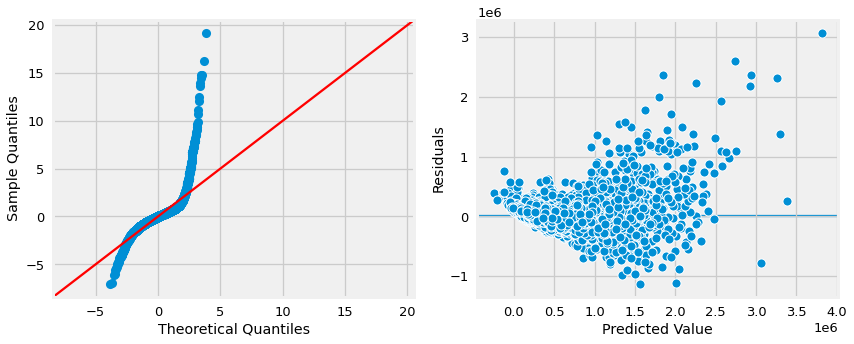

In [25]:
## instantiate an OLS model WITH the training data.
model_raw = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result_raw = model_raw.fit()
sf.evaluate_ols(result_raw,X_train_df, y_train)

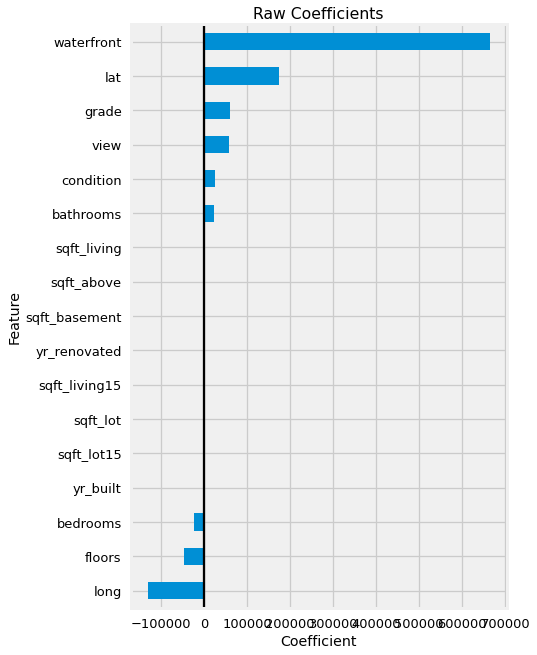

In [26]:
fig_raw = sf.plot_coeffs(result_raw, ohe_cols, include_const=True,title="Raw Coefficients")

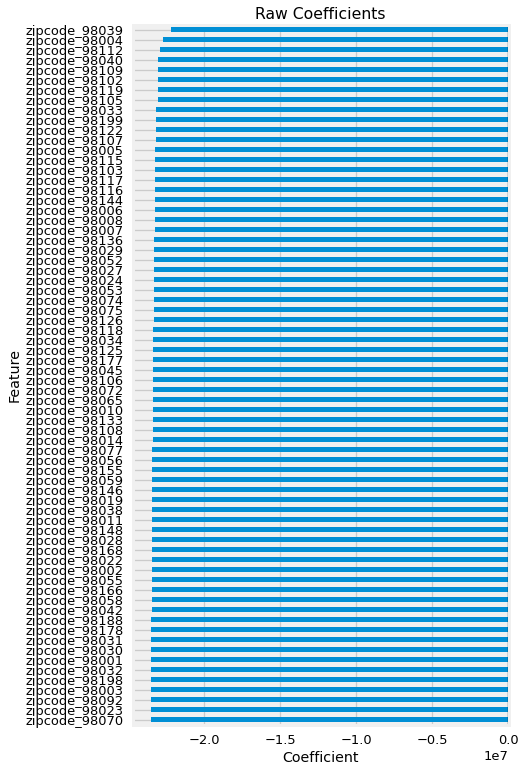

In [27]:
fig_raw_zips =sf.plot_coeffs(result_raw, nonohe_cols, figsize=(6,12),
                           include_const=True,title="Raw Coefficients")

### Raw Numeric - with Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     814.3
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:20:28   Log-Likelihood:            -2.1725e+05
No. Observations:               16209   AIC:                         4.347e+05
Df Residuals:                   16123   BIC:                         4.353e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.396e+04   1747.120    -13.713      0.000   -2.74e+04   -2.05e+04
bathrooms      2.383e+04   3008.253      7.920      0.000    1.79e+04    2.97e+04
sqft_living     108.8359      2.131     51.069      0.000     104.659     113.013
sqft_lot          0.2131      0.044      4.898      0.000       0.128       0.298
floors        -4.679e+04   3642.723    -12.845      0.000   -5.39e+04   -3.97e+04
waterfront     6.636e+05   1.62e+04     41.062      0.000    6.32e+05    6.95e+05
view           5.885e+04   2024.734     29.064      0.000    5.49e+04    6.28e+04
condition      2.423e+04   2219.427     10.915      0.000    1.99e+04    2.86e+04
grade          5.925e+04   2093.555     28.300      0.000    5.51e+04    6.34e+04
sqft_above       92.6423      2.188     42.336      0.000      88.353      96.932
sqft_basement    16.1931      2.510      6.451      0.000      11.273      21.113
yr_built       -630.0609     74.956     -8.406      0.000    -776.983    -483.139
yr_renovated     15.4010      3.380      4.557      0.000       8.777      22.025
lat            1.731e+05    7.3e+04      2.372      0.018       3e+04    3.16e+05
long          -1.307e+05   5.18e+04     -2.524      0.012   -2.32e+05   -2.92e+04
sqft_living15    11.5176      3.347      3.441      0.001       4.957      18.078
sqft_lot15       -0.0752      0.068     -1.110      0.267      -0.208       0.058
zipcode_98001 -4.919e+05    9.6e+04     -5.126      0.000    -6.8e+05   -3.04e+05
zipcode_98002 -4.607e+05   9.36e+04     -4.922      0.000   -6.44e+05   -2.77e+05
zipcode_98003 -5.186e+05   9.82e+04     -5.284      0.000   -7.11e+05   -3.26e+05
zipcode_98004  2.518e+05   1.01e+05      2.485      0.013    5.32e+04     4.5e+05
zipcode_98005 -2.224e+05      1e+05     -2.225      0.026   -4.18e+05   -2.65e+04
zipcode_98006  -2.63e+05   9.66e+04     -2.722      0.006   -4.52e+05   -7.36e+04
zipcode_98007 -2.843e+05    9.9e+04     -2.871      0.004   -4.78e+05   -9.02e+04
zipcode_98008 -2.732e+05   9.74e+04     -2.805      0.005   -4.64e+05   -8.23e+04
zipcode_98010 -4.019e+05   8.51e+04     -4.723      0.000   -5.69e+05   -2.35e+05
zipcode_98011 -4.428e+05   1.07e+05     -4.157      0.000   -6.52e+05   -2.34e+05
zipcode_98014  -4.07e+05   8.98e+04     -4.530      0.000   -5.83e+05   -2.31e+05
zipcode_98019 -4.391e+05    9.6e+04     -4.573      0.000   -6.27e+05   -2.51e+05
zipcode_98022 -4.571e+05   8.13e+04     -5.621      0.000   -6.16e+05   -2.98e+05
zipcode_98023 -5.438e+05      1e+05     -5.414      0.000   -7.41e+05   -3.47e+05
zipcode_98024 -3.274e+05   8.85e+04     -3.700      0.000   -5.01e+05   -1.54e+05
zipcode_98027 -3.226e+05    9.1e+04     -3.546      0.000   -5.01e+05   -1.44e+05
zipcode_98028  -4.51e+05   1.08e+05     -4.165      0.000   -6.63e+05   -2.39e+05
zipcode_98029 -2.974e+05   9.06e+04     -3.282   

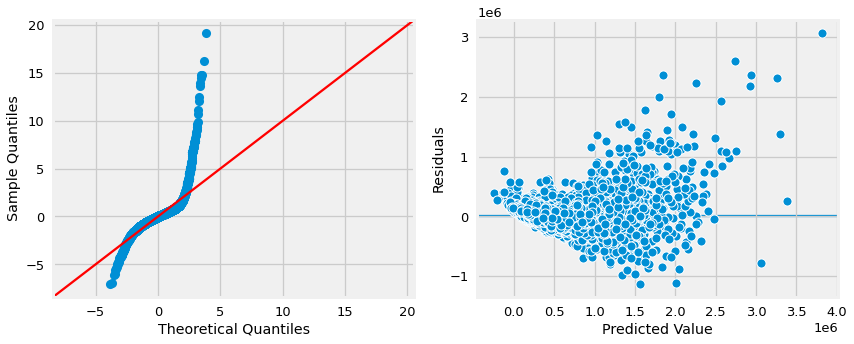

In [28]:
## instantiate an OLS model WITH the training data.
model_raw_cnst = sm.OLS(y_train, X_train_df_cnst)

## Fit the model and view the summary
result_raw_cnst = model_raw_cnst.fit()
sf.evaluate_ols(result_raw_cnst,X_train_df_cnst, y_train)

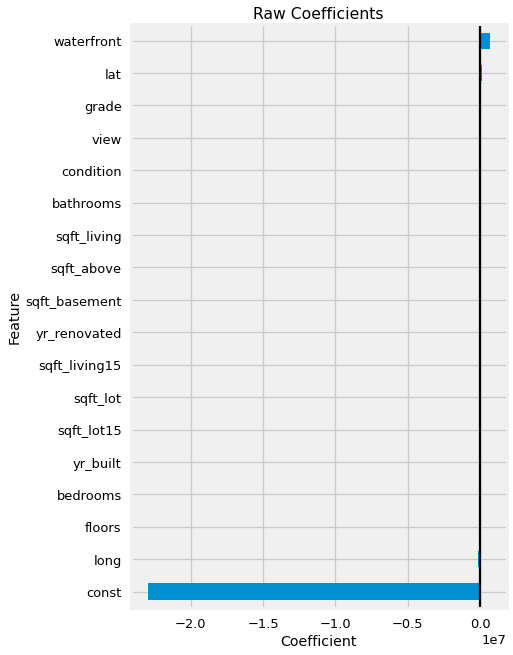

In [29]:
fig_raw =sf.plot_coeffs(result_raw_cnst, ohe_cols, include_const=True,title="Raw Coefficients")

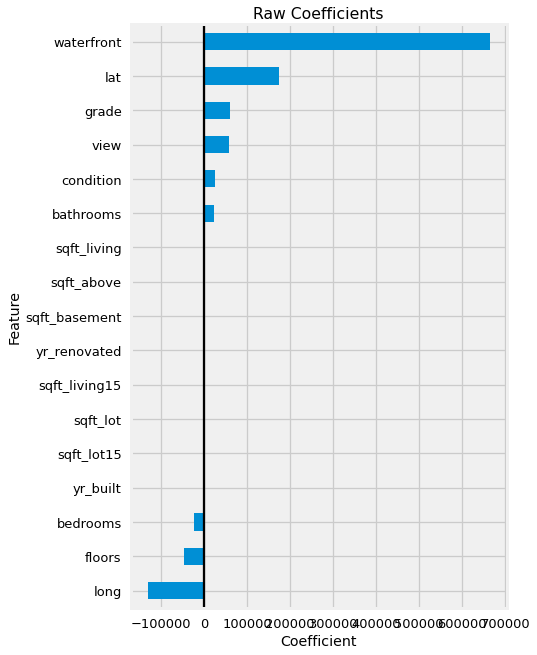

In [30]:
fig_raw =sf.plot_coeffs(result_raw_cnst, ohe_cols, include_const=False,title="Raw Coefficients")

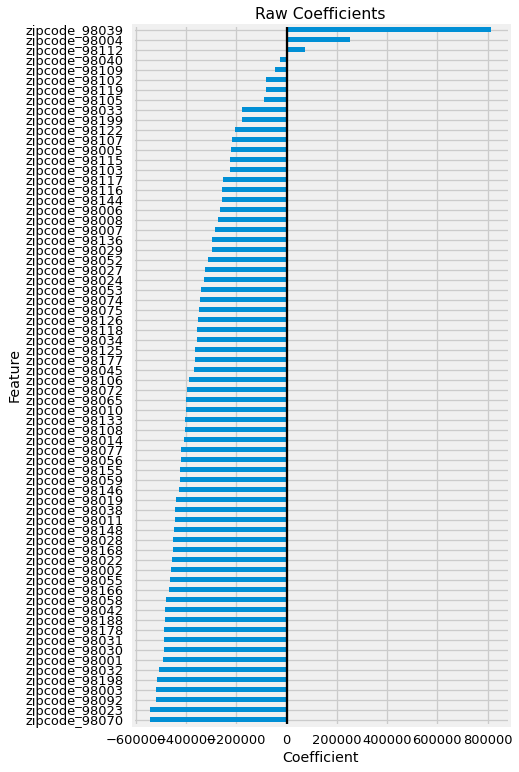

In [31]:
fig_raw_zips =sf.plot_coeffs(result_raw_cnst, nonohe_cols, figsize=(6,12),include_const=False,title="Raw Coefficients")

### Scaled Numeric - No Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     814.3
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:20:29   Log-Likelihood:            -2.1725e+05
No. Observations:               16209   AIC:                         4.347e+05
Df Residuals:                   16123   BIC:                         4.353e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.249e+04   1639.659    -13.713      0.000   -2.57e+04   -1.93e+04
bathrooms      1.839e+04   2321.955      7.920      0.000    1.38e+04    2.29e+04
sqft_living    8.674e+04   1509.782     57.451      0.000    8.38e+04    8.97e+04
sqft_lot       8979.0553   1833.377      4.898      0.000    5385.432    1.26e+04
floors        -2.533e+04   1971.931    -12.845      0.000   -2.92e+04   -2.15e+04
waterfront     5.805e+04   1413.735     41.062      0.000    5.53e+04    6.08e+04
view           4.525e+04   1557.043     29.064      0.000    4.22e+04    4.83e+04
condition      1.585e+04   1452.454     10.915      0.000     1.3e+04    1.87e+04
grade           6.98e+04   2466.481     28.300      0.000     6.5e+04    7.46e+04
sqft_above     8.874e+04   1636.106     54.238      0.000    8.55e+04    9.19e+04
sqft_basement  1.342e+04   1471.710      9.120      0.000    1.05e+04    1.63e+04
yr_built      -1.858e+04   2210.571     -8.406      0.000   -2.29e+04   -1.42e+04
yr_renovated   6228.1467   1366.710      4.557      0.000    3549.244    8907.050
lat            2.404e+04   1.01e+04      2.372      0.018    4173.070    4.39e+04
long          -1.845e+04   7312.107     -2.524      0.012   -3.28e+04   -4120.423
sqft_living15  7914.6522   2300.081      3.441      0.001    3406.237    1.24e+04
sqft_lot15    -2105.7465   1897.059     -1.110      0.267   -5824.193    1612.700
zipcode_98001  3.924e+05   2.12e+04     18.548      0.000    3.51e+05    4.34e+05
zipcode_98002  4.236e+05   2.25e+04     18.848      0.000     3.8e+05    4.68e+05
zipcode_98003  3.657e+05   2.21e+04     16.578      0.000    3.22e+05    4.09e+05
zipcode_98004  1.136e+06   1.12e+04    101.652      0.000    1.11e+06    1.16e+06
zipcode_98005  6.619e+05   1.54e+04     42.987      0.000    6.32e+05    6.92e+05
zipcode_98006  6.213e+05   9331.319     66.587      0.000    6.03e+05     6.4e+05
zipcode_98007      6e+05   1.66e+04     36.061      0.000    5.67e+05    6.33e+05
zipcode_98008  6.111e+05   1.32e+04     46.205      0.000    5.85e+05    6.37e+05
zipcode_98010  4.824e+05   2.63e+04     18.328      0.000    4.31e+05    5.34e+05
zipcode_98011  4.415e+05   1.96e+04     22.562      0.000    4.03e+05     4.8e+05
zipcode_98014  4.773e+05   2.67e+04     17.881      0.000    4.25e+05     5.3e+05
zipcode_98019  4.453e+05   2.34e+04     19.029      0.000    3.99e+05    4.91e+05
zipcode_98022  4.272e+05   2.98e+04     14.329      0.000    3.69e+05    4.86e+05
zipcode_98023  3.405e+05   2.21e+04     15.391      0.000    2.97e+05    3.84e+05
zipcode_98024  5.569e+05   2.58e+04     21.553      0.000    5.06e+05    6.08e+05
zipcode_98027  5.617e+05   1.29e+04     43.431      0.000    5.36e+05    5.87e+05
zipcode_98028  4.333e+05   1.81e+04     23.920      0.000    3.98e+05    4.69e+05
zipcode_98029   5.87e+05   1.49e+04     39.293   

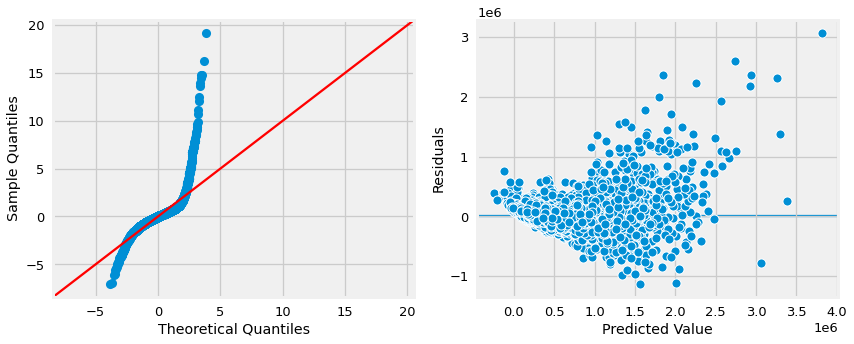

In [32]:
## instantiate an OLS model WITH the training data.
model_scaled = sm.OLS(y_train, X_train_scaled_df)

## Fit the model and view the summary
result_scaled = model_scaled.fit()
sf.evaluate_ols(result_scaled,X_train_scaled_df, y_train)

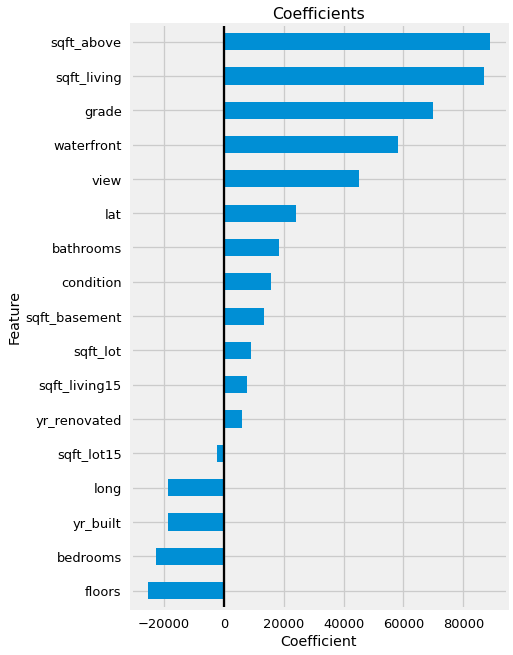

In [33]:
fig_scaled =sf.plot_coeffs(result_scaled,ohe_cols,include_const=True)

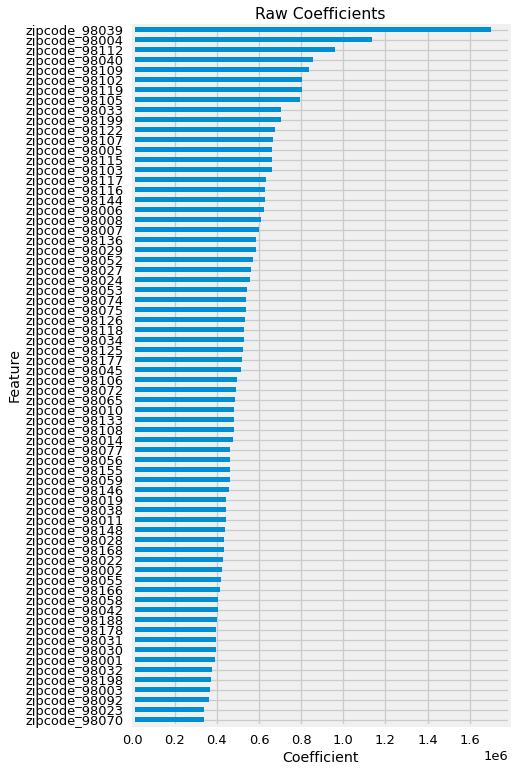

In [34]:
fig_scaled_zips =sf.plot_coeffs(result_scaled, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

### Scaled Numeric - with Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     814.3
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:20:30   Log-Likelihood:            -2.1725e+05
No. Observations:               16209   AIC:                         4.347e+05
Df Residuals:                   16123   BIC:                         4.353e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.249e+04   1639.659    -13.713      0.000   -2.57e+04   -1.93e+04
bathrooms      1.839e+04   2321.955      7.920      0.000    1.38e+04    2.29e+04
sqft_living    8.674e+04   1509.782     57.451      0.000    8.38e+04    8.97e+04
sqft_lot       8979.0553   1833.377      4.898      0.000    5385.432    1.26e+04
floors        -2.533e+04   1971.931    -12.845      0.000   -2.92e+04   -2.15e+04
waterfront     5.805e+04   1413.735     41.062      0.000    5.53e+04    6.08e+04
view           4.525e+04   1557.043     29.064      0.000    4.22e+04    4.83e+04
condition      1.585e+04   1452.454     10.915      0.000     1.3e+04    1.87e+04
grade           6.98e+04   2466.481     28.300      0.000     6.5e+04    7.46e+04
sqft_above     8.874e+04   1636.106     54.238      0.000    8.55e+04    9.19e+04
sqft_basement  1.342e+04   1471.710      9.120      0.000    1.05e+04    1.63e+04
yr_built      -1.858e+04   2210.571     -8.406      0.000   -2.29e+04   -1.42e+04
yr_renovated   6228.1467   1366.710      4.557      0.000    3549.244    8907.050
lat            2.404e+04   1.01e+04      2.372      0.018    4173.070    4.39e+04
long          -1.845e+04   7312.107     -2.524      0.012   -3.28e+04   -4120.423
sqft_living15  7914.6522   2300.081      3.441      0.001    3406.237    1.24e+04
sqft_lot15    -2105.7465   1897.059     -1.110      0.267   -5824.193    1612.700
zipcode_98001 -1.561e+05   2.08e+04     -7.519      0.000   -1.97e+05   -1.15e+05
zipcode_98002 -1.249e+05    2.2e+04     -5.666      0.000   -1.68e+05   -8.17e+04
zipcode_98003 -1.827e+05   2.17e+04     -8.431      0.000   -2.25e+05    -1.4e+05
zipcode_98004  5.876e+05   1.13e+04     51.936      0.000    5.65e+05     6.1e+05
zipcode_98005  1.134e+05   1.54e+04      7.381      0.000    8.33e+04    1.44e+05
zipcode_98006  7.289e+04   9303.996      7.835      0.000    5.47e+04    9.11e+04
zipcode_98007  5.154e+04   1.66e+04      3.108      0.002     1.9e+04     8.4e+04
zipcode_98008  6.264e+04   1.33e+04      4.719      0.000    3.66e+04    8.87e+04
zipcode_98010 -6.607e+04   2.58e+04     -2.557      0.011   -1.17e+05   -1.54e+04
zipcode_98011 -1.069e+05   1.98e+04     -5.391      0.000   -1.46e+05   -6.81e+04
zipcode_98014 -7.115e+04   2.66e+04     -2.670      0.008   -1.23e+05   -1.89e+04
zipcode_98019 -1.032e+05   2.35e+04     -4.385      0.000   -1.49e+05   -5.71e+04
zipcode_98022 -1.212e+05   2.93e+04     -4.133      0.000   -1.79e+05   -6.37e+04
zipcode_98023  -2.08e+05   2.18e+04     -9.548      0.000   -2.51e+05   -1.65e+05
zipcode_98024  8422.8487   2.56e+04      0.329      0.742   -4.17e+04    5.85e+04
zipcode_98027  1.325e+04   1.28e+04      1.039      0.299   -1.17e+04    3.83e+04
zipcode_98028 -1.151e+05   1.85e+04     -6.235      0.000   -1.51e+05   -7.89e+04
zipcode_98029  3.851e+04   1.48e+04      2.594   

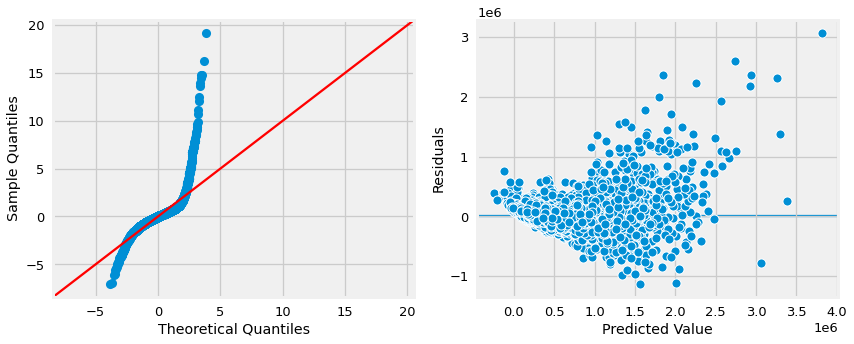

In [35]:
## instantiate an OLS model WITH the training data.
model_scaled_cnst = sm.OLS(y_train, X_train_scaled_df_cnst)

## Fit the model and view the summary
result_scaled_cnst = model_scaled_cnst.fit()
sf.evaluate_ols(result_scaled_cnst,X_train_scaled_df_cnst, y_train)

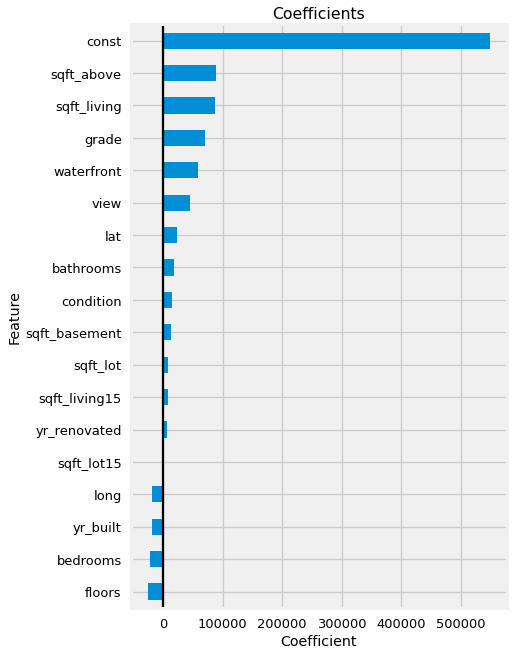

In [36]:
fig_scaled =sf.plot_coeffs(result_scaled_cnst,ohe_cols,include_const=True)

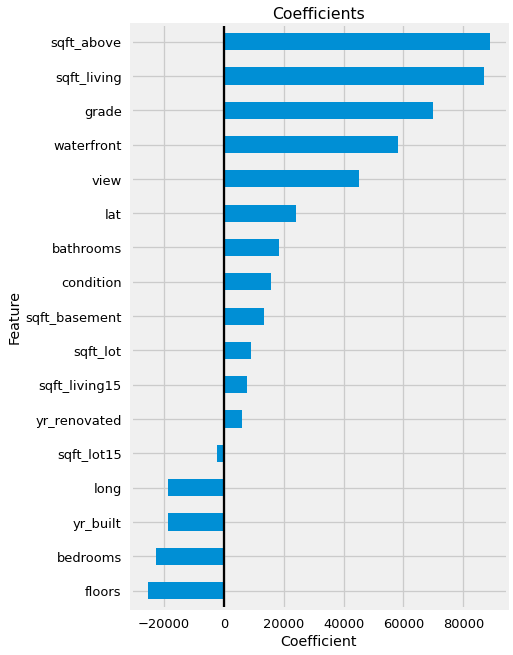

In [37]:
fig_scaled =sf.plot_coeffs(result_scaled_cnst,ohe_cols,include_const=False)

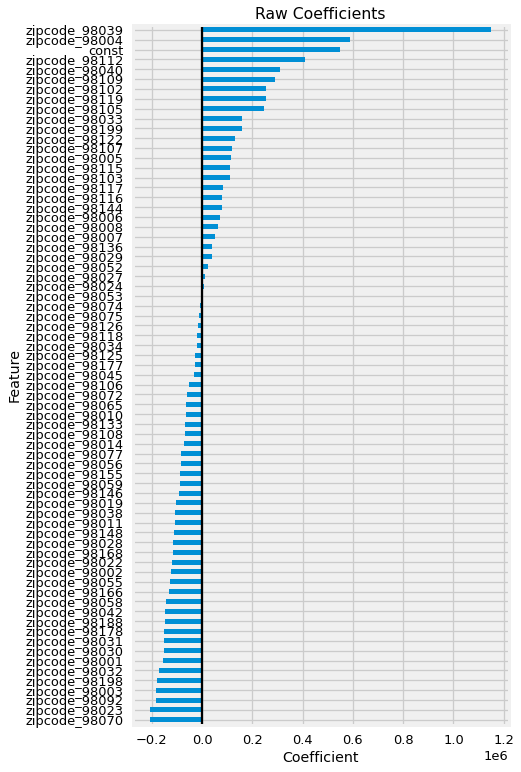

In [38]:
fig_scaled_zips =sf.plot_coeffs(result_scaled_cnst, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

## Modeling - No Outliers

### Raw Numeric - No Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     831.3
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:20:31   Log-Likelihood:            -1.8068e+05
No. Observations:               14026   AIC:                         3.615e+05
Df Residuals:                   13942   BIC:                         3.622e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -5191.6742   1265.960     -4.101      0.000   -7673.125   -2710.224
bathrooms      1.589e+04   2084.951      7.622      0.000    1.18e+04       2e+04
sqft_living      72.1400      1.586     45.480      0.000      69.031      75.249
sqft_lot          1.1228      0.122      9.210      0.000       0.884       1.362
floors        -2.476e+04   2420.838    -10.229      0.000   -2.95e+04      -2e+04
waterfront        0.0004      0.000      2.975      0.003       0.000       0.001
view           3.611e+04   2150.884     16.787      0.000    3.19e+04    4.03e+04
condition      2.465e+04   1443.223     17.081      0.000    2.18e+04    2.75e+04
grade           4.92e+04   1424.839     34.531      0.000    4.64e+04     5.2e+04
sqft_above       66.2426      1.571     42.170      0.000      63.164      69.322
sqft_basement     5.9000      1.798      3.282      0.001       2.376       9.424
yr_built       -494.2670     49.877     -9.910      0.000    -592.033    -396.501
yr_renovated     -0.0001   3.78e-05     -2.975      0.003      -0.000   -3.84e-05
lat            1.235e+05   4.94e+04      2.500      0.012    2.67e+04     2.2e+05
long          -1.013e+05   4.68e+04     -2.164      0.030   -1.93e+05   -9562.493
sqft_living15    23.5548      2.414      9.759      0.000      18.824      28.286
sqft_lot15       -0.7802      0.167     -4.659      0.000      -1.108      -0.452
zipcode_98001  -1.77e+07   5.89e+06     -3.004      0.003   -2.92e+07   -6.15e+06
zipcode_98002 -1.768e+07   5.89e+06     -3.002      0.003   -2.92e+07   -6.14e+06
zipcode_98003 -1.771e+07   5.89e+06     -3.004      0.003   -2.93e+07   -6.15e+06
zipcode_98004 -1.712e+07   5.89e+06     -2.906      0.004   -2.87e+07   -5.57e+06
zipcode_98005  -1.74e+07   5.89e+06     -2.953      0.003   -2.89e+07   -5.85e+06
zipcode_98006 -1.746e+07   5.89e+06     -2.964      0.003    -2.9e+07   -5.91e+06
zipcode_98007 -1.748e+07   5.89e+06     -2.967      0.003    -2.9e+07   -5.93e+06
zipcode_98008 -1.748e+07   5.89e+06     -2.969      0.003    -2.9e+07   -5.94e+06
zipcode_98010 -1.759e+07   5.88e+06     -2.991      0.003   -2.91e+07   -6.06e+06
zipcode_98011  -1.76e+07    5.9e+06     -2.986      0.003   -2.92e+07   -6.05e+06
zipcode_98014 -1.759e+07   5.88e+06     -2.991      0.003   -2.91e+07   -6.06e+06
zipcode_98019 -1.763e+07   5.88e+06     -2.995      0.003   -2.92e+07   -6.09e+06
zipcode_98022 -1.766e+07   5.88e+06     -3.003      0.003   -2.92e+07   -6.13e+06
zipcode_98023 -1.773e+07    5.9e+06     -3.007      0.003   -2.93e+07   -6.17e+06
zipcode_98024 -1.755e+07   5.88e+06     -2.984      0.003   -2.91e+07   -6.02e+06
zipcode_98027  -1.75e+07   5.89e+06     -2.974      0.003    -2.9e+07   -5.97e+06
zipcode_98028 -1.762e+07    5.9e+06     -2.988      0.003   -2.92e+07   -6.06e+06
zipcode_98029 -1.748e+07   5.88e+06     -2.971   

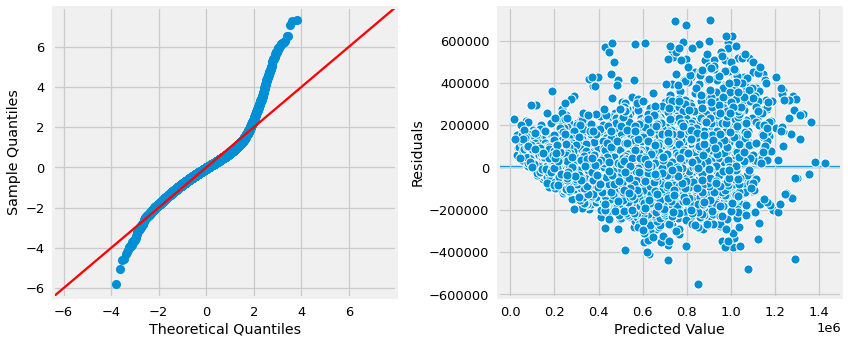

In [39]:
## instantiate an OLS model WITH the training data.
model_cln = sm.OLS(y_train_cln, X_train_df_cln)

## Fit the model and view the summary
result_cln = model_cln.fit()
sf.evaluate_ols(result_cln,X_train_df_cln, y_train_cln)

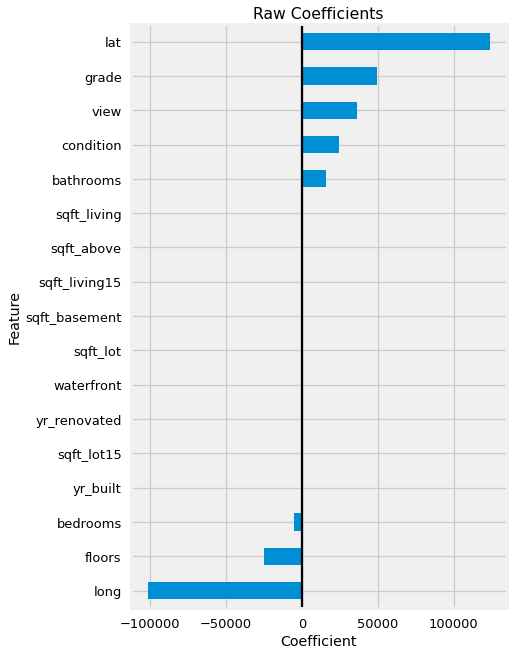

In [40]:
fig_raw =sf.plot_coeffs(result_cln, ohe_cols, include_const=True,title="Raw Coefficients")

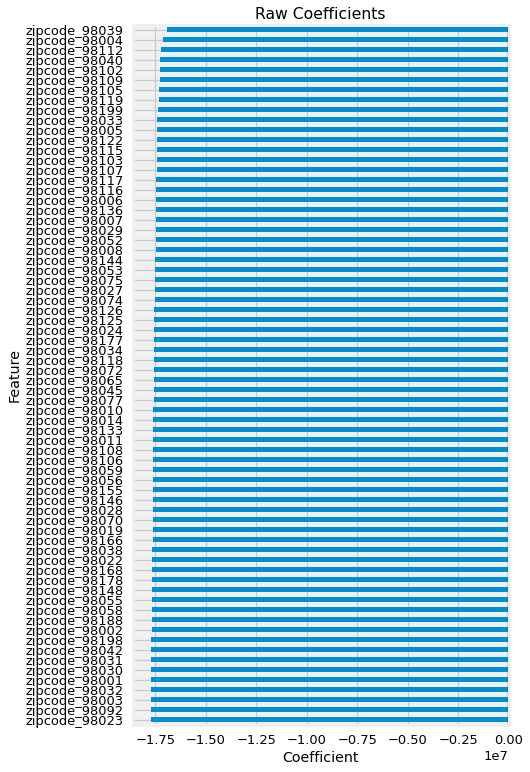

In [41]:
fig_raw_zips =sf.plot_coeffs(result_cln, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

### Raw Numeric - with Constant

In [42]:
X_train_df_cln_cnst.describe()

bedrooms     bathrooms   sqft_living       sqft_lot        floors  \
count  14026.000000  14026.000000  14026.000000   14026.000000  14026.000000   
mean       3.322829      2.038001   1951.864894    9817.669614      1.481998   
std        0.848706      0.691919    740.005605   11416.579410      0.538447   
min        1.000000      0.500000    370.000000     520.000000      1.000000   
25%        3.000000      1.500000   1400.000000    5000.000000      1.000000   
50%        3.000000      2.000000   1840.000000    7375.000000      1.000000   
75%        4.000000      2.500000   2410.000000    9900.000000      2.000000   
max        6.000000      4.250000   4750.000000  137214.000000      3.000000   

       waterfront          view     condition         grade    sqft_above  \
count     14026.0  14026.000000  14026.000000  14026.000000  14026.000000   
mean          0.0      0.089405      3.422715      7.535078   1697.819549   
std           0.0      0.395508      0.648856      1.028411    711.184980   
min           0.0      0.000000      2.000000      5.000000    370.000000   
25%           0.0      0.000000      3.000000      7.000000   1170.000000   
50%           0.0      0.000000      3.000000      7.000000   1509.500000   
75%           0.0      0.000000      4.000000      8.000000   2100.000000   
max           0.0      2.000000      5.000000     11.000000   4270.000000   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   14026.000000  14026.000000       14026.0  14026.000000  14026.000000   
mean      254.045344   1971.727292           0.0     47.560516   -122.220398   
std       387.164969     28.993672           0.0      0.140097      0.128678   
min         0.000000   1900.000000           0.0     47.176400   -122.502000   
25%         0.000000   1953.000000           0.0     47.468300   -122.329000   
50%         0.000000   1975.000000           0.0     47.571800   -122.235000   
75%       500.000000   1997.000000           0.0     47.681100   -122.134000   
max      1610.000000   2015.000000           0.0     47.777600   -121.797000   

       sqft_living15    sqft_lot15  zipcode_98001  zipcode_98002  \
count   14026.000000  14026.000000   14026.000000   14026.000000   
mean     1913.074433   9029.714245       0.017396       0.010409   
std       600.621487   8785.328471       0.130747       0.101497   
min       460.000000    660.000000       0.000000       0.000000   
25%      1470.000000   5000.000000       0.000000       0.000000   
50%      1800.000000   7438.500000       0.000000       0.000000   
75%      2260.000000   9600.000000       0.000000       0.000000   
max      4040.000000  93393.000000       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.014758       0.011621       0.008056       0.020533   
std         0.120588       0.107178       0.089399       0.141821   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.007130       0.013404       0.003993       0.009411   
std         0.084139       0.115000       0.063063       0.096557   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_980

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     831.3
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:20:31   Log-Likelihood:            -1.8068e+05
No. Observations:               14026   AIC:                         3.615e+05
Df Residuals:                   13942   BIC:                         3.622e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -5191.6742   1265.960     -4.101      0.000   -7673.125   -2710.224
bathrooms      1.589e+04   2084.951      7.622      0.000    1.18e+04       2e+04
sqft_living      72.1409      1.586     45.481      0.000      69.032      75.250
sqft_lot          1.1228      0.122      9.210      0.000       0.884       1.362
floors        -2.476e+04   2420.838    -10.229      0.000   -2.95e+04      -2e+04
waterfront     1.057e-05   3.55e-06      2.973      0.003     3.6e-06    1.75e-05
view           3.611e+04   2150.884     16.787      0.000    3.19e+04    4.03e+04
condition      2.465e+04   1443.223     17.081      0.000    2.18e+04    2.75e+04
grade           4.92e+04   1424.839     34.531      0.000    4.64e+04     5.2e+04
sqft_above       66.2417      1.571     42.170      0.000      63.163      69.321
sqft_basement     5.8991      1.798      3.281      0.001       2.375       9.423
yr_built       -494.2670     49.877     -9.910      0.000    -592.033    -396.501
yr_renovated  -7.034e-08   2.36e-08     -2.980      0.003   -1.17e-07   -2.41e-08
lat            1.235e+05   4.94e+04      2.500      0.012    2.67e+04     2.2e+05
long          -1.013e+05   4.68e+04     -2.164      0.030   -1.93e+05   -9562.493
sqft_living15    23.5548      2.414      9.759      0.000      18.824      28.286
sqft_lot15       -0.7802      0.167     -4.659      0.000      -1.108      -0.452
zipcode_98001 -4.141e+05   8.36e+04     -4.955      0.000   -5.78e+05    -2.5e+05
zipcode_98002 -3.975e+05    8.1e+04     -4.907      0.000   -5.56e+05   -2.39e+05
zipcode_98003 -4.221e+05   8.53e+04     -4.948      0.000   -5.89e+05   -2.55e+05
zipcode_98004   1.61e+05   8.38e+04      1.921      0.055   -3294.376    3.25e+05
zipcode_98005 -1.152e+05   8.25e+04     -1.397      0.162   -2.77e+05    4.64e+04
zipcode_98006  -1.73e+05   8.06e+04     -2.147      0.032   -3.31e+05    -1.5e+04
zipcode_98007  -1.94e+05   8.13e+04     -2.385      0.017   -3.53e+05   -3.46e+04
zipcode_98008 -1.994e+05   8.01e+04     -2.489      0.013   -3.56e+05   -4.24e+04
zipcode_98010 -3.036e+05    7.3e+04     -4.159      0.000   -4.47e+05    -1.6e+05
zipcode_98011 -3.189e+05   8.61e+04     -3.704      0.000   -4.88e+05    -1.5e+05
zipcode_98014 -3.067e+05   7.42e+04     -4.136      0.000   -4.52e+05   -1.61e+05
zipcode_98019 -3.427e+05   7.65e+04     -4.478      0.000   -4.93e+05   -1.93e+05
zipcode_98022 -3.698e+05   7.09e+04     -5.216      0.000   -5.09e+05   -2.31e+05
zipcode_98023  -4.47e+05   8.76e+04     -5.100      0.000   -6.19e+05   -2.75e+05
zipcode_98024  -2.63e+05   7.21e+04     -3.648      0.000   -4.04e+05   -1.22e+05
zipcode_98027 -2.185e+05   7.59e+04     -2.879      0.004   -3.67e+05   -6.97e+04
zipcode_98028 -3.343e+05   8.78e+04     -3.808      0.000   -5.06e+05   -1.62e+05
zipcode_98029 -1.946e+05   7.45e+04     -2.611   

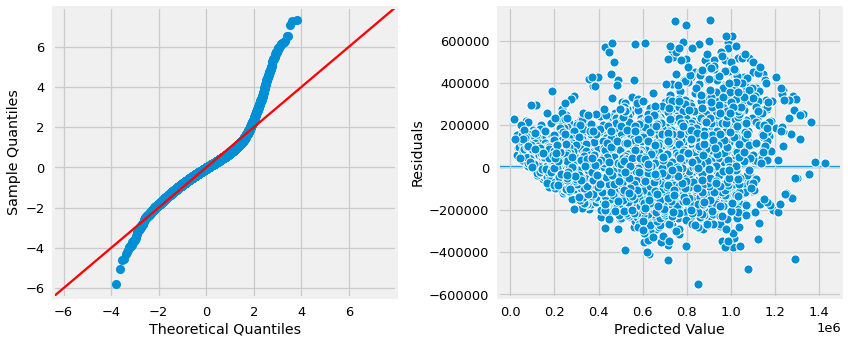

In [43]:
## instantiate an OLS model WITH the training data.
model_cln_cnst = sm.OLS(y_train_cln, X_train_df_cln_cnst)

## Fit the model and view the summary
result_cln_cnst = model_cln_cnst.fit()
sf.evaluate_ols(result_cln_cnst,X_train_df_cln_cnst, y_train_cln)

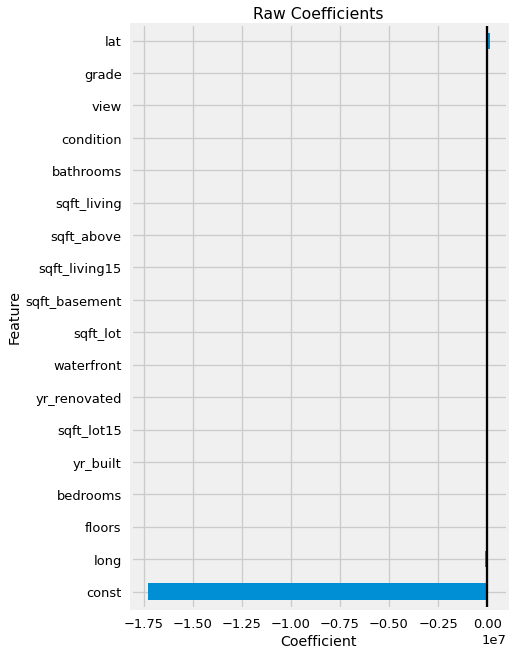

In [44]:
fig_raw =sf.plot_coeffs(result_cln_cnst, ohe_cols, include_const=True,title="Raw Coefficients")

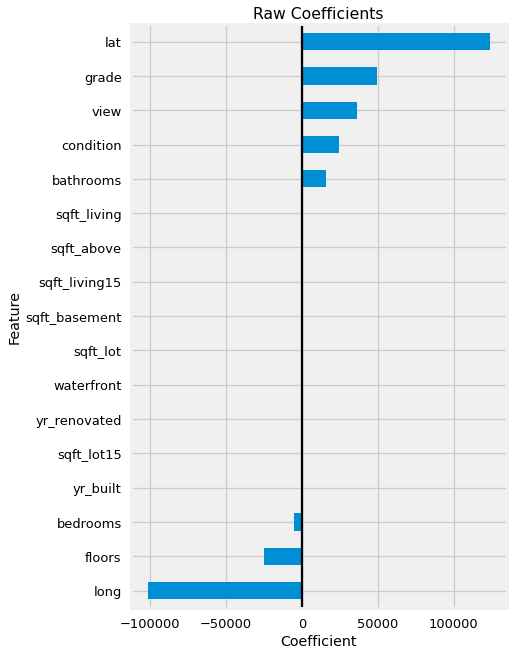

In [45]:
fig_raw =sf.plot_coeffs(result_cln_cnst, ohe_cols, include_const=False,title="Raw Coefficients")

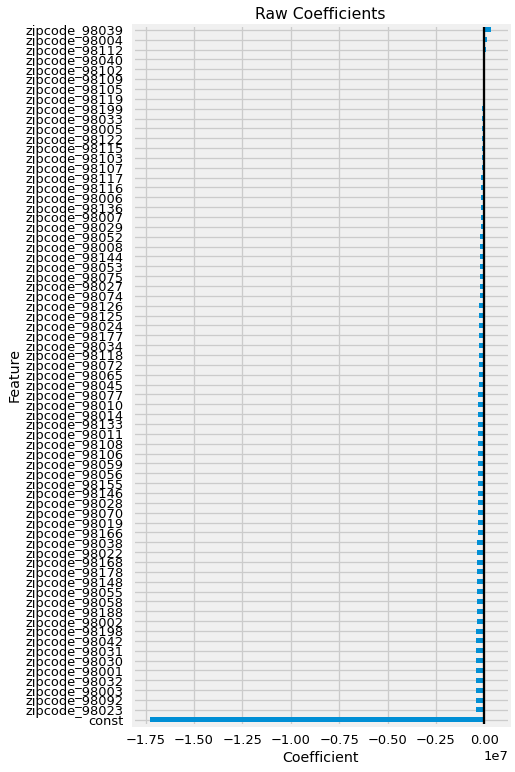

In [46]:
fig_raw_zips =sf.plot_coeffs(result_cln_cnst, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

### Scaled Numeric - No Constant

In [47]:
X_train_scaled_df_cln.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04   
mean   2.269522e-16  1.904777e-16 -1.043575e-16 -2.064353e-17 -7.193574e-17   
std    1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min   -2.737005e+00 -2.222884e+00 -2.137715e+00 -8.144297e-01 -8.951943e-01   
25%   -3.803916e-01 -7.775766e-01 -7.457843e-01 -4.220039e-01 -8.951943e-01   
50%   -3.803916e-01 -5.492292e-02 -1.511730e-01 -2.139657e-01 -8.951943e-01   
75%    7.979150e-01  6.677308e-01  6.191189e-01  7.211733e-03  9.620640e-01   
max    3.154528e+00  3.197019e+00  3.781370e+00  1.115929e+01  2.819322e+00   

       waterfront          view     condition         grade    sqft_above  \
count     14026.0  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04   
mean          0.0  2.127677e-17 -6.028418e-17  9.574546e-17  1.104366e-16   
std           0.0  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min           0.0 -2.260599e-01 -2.192729e+00 -2.465132e+00 -1.867119e+00   
25%           0.0 -2.260599e-01 -6.515005e-01 -5.203143e-01 -7.421956e-01   
50%           0.0 -2.260599e-01 -6.515005e-01 -5.203143e-01 -2.648063e-01   
75%           0.0 -2.260599e-01  8.897284e-01  4.520945e-01  5.655277e-01   
max           0.0  4.830905e+00  2.430957e+00  3.369321e+00  3.616882e+00   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   1.402600e+04  1.402600e+04       14026.0  1.402600e+04  1.402600e+04   
mean    8.004118e-17 -3.185436e-15           0.0  2.031273e-14 -2.339431e-14   
std     1.000036e+00  1.000036e+00           0.0  1.000036e+00  1.000036e+00   
min    -6.561916e-01 -2.473983e+00           0.0 -2.741890e+00 -2.188505e+00   
25%    -6.561916e-01 -6.459327e-01           0.0 -6.582541e-01 -8.440149e-01   
50%    -6.561916e-01  1.128806e-01           0.0  8.054811e-02 -1.134825e-01   
75%     6.352936e-01  8.716940e-01           0.0  8.607518e-01  6.714512e-01   
max     3.502391e+00  1.492541e+00           0.0  1.549587e+00  3.290488e+00   

       sqft_living15    sqft_lot15  zipcode_98001  zipcode_98002  \
count   1.402600e+04  1.402600e+04   14026.000000   14026.000000   
mean    2.836902e-17  2.380972e-17       0.017396       0.010409   
std     1.000036e+00  1.000036e+00       0.130747       0.101497   
min    -2.419371e+00 -9.527262e-01       0.000000       0.000000   
25%    -7.377196e-01 -4.587032e-01       0.000000       0.000000   
50%    -1.882691e-01 -1.811282e-01       0.000000       0.000000   
75%     5.776316e-01  6.491574e-02       0.000000       0.000000   
max     3.541334e+00  9.603089e+00       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.014758       0.011621       0.008056       0.020533   
std         0.120588       0.107178       0.089399       0.141821   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.007130       0.013404       0.003993       0.009411   
std         0.084139       0.115000       0.063063       0.096557   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98014  zipco

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     831.3
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:20:32   Log-Likelihood:            -1.8068e+05
No. Observations:               14026   AIC:                         3.615e+05
Df Residuals:                   13942   BIC:                         3.622e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -4406.0472   1074.389     -4.101      0.000   -6511.994   -2300.101
bathrooms        1.1e+04   1442.566      7.622      0.000    8167.690    1.38e+04
sqft_living    5.024e+04    962.063     52.217      0.000    4.84e+04    5.21e+04
sqft_lot       1.282e+04   1391.699      9.210      0.000    1.01e+04    1.55e+04
floors        -1.333e+04   1303.447    -10.229      0.000   -1.59e+04   -1.08e+04
waterfront    -8.294e-10   4.28e-11    -19.399      0.000   -9.13e-10   -7.46e-10
view           1.428e+04    850.662     16.787      0.000    1.26e+04    1.59e+04
condition        1.6e+04    936.410     17.081      0.000    1.42e+04    1.78e+04
grade           5.06e+04   1465.268     34.531      0.000    4.77e+04    5.35e+04
sqft_above     5.013e+04    981.880     51.058      0.000    4.82e+04    5.21e+04
sqft_basement  3930.1222    914.320      4.298      0.000    2137.933    5722.311
yr_built      -1.433e+04   1446.074     -9.910      0.000   -1.72e+04   -1.15e+04
yr_renovated  -9.036e-10   3.38e-11    -26.769      0.000    -9.7e-10   -8.37e-10
lat            1.731e+04   6922.473      2.500      0.012    3737.717    3.09e+04
long          -1.304e+04   6024.946     -2.164      0.030   -2.48e+04   -1230.437
sqft_living15  1.415e+04   1449.657      9.759      0.000    1.13e+04     1.7e+04
sqft_lot15    -6853.6778   1471.153     -4.659      0.000   -9737.336   -3970.020
zipcode_98001  3.284e+05   1.43e+04     22.900      0.000       3e+05    3.56e+05
zipcode_98002  3.449e+05   1.47e+04     23.479      0.000    3.16e+05    3.74e+05
zipcode_98003  3.204e+05   1.49e+04     21.495      0.000    2.91e+05     3.5e+05
zipcode_98004  9.034e+05   8095.250    111.597      0.000    8.88e+05    9.19e+05
zipcode_98005  6.272e+05   9761.702     64.253      0.000    6.08e+05    6.46e+05
zipcode_98006  5.695e+05   6616.453     86.070      0.000    5.57e+05    5.82e+05
zipcode_98007  5.485e+05   1.07e+04     51.438      0.000    5.28e+05    5.69e+05
zipcode_98008  5.431e+05   9107.130     59.633      0.000    5.25e+05    5.61e+05
zipcode_98010  4.389e+05   1.89e+04     23.214      0.000    4.02e+05    4.76e+05
zipcode_98011  4.236e+05   1.28e+04     33.059      0.000    3.98e+05    4.49e+05
zipcode_98014  4.357e+05   2.13e+04     20.445      0.000    3.94e+05    4.77e+05
zipcode_98019  3.997e+05    1.8e+04     22.253      0.000    3.65e+05    4.35e+05
zipcode_98022  3.726e+05   2.11e+04     17.685      0.000    3.31e+05    4.14e+05
zipcode_98023  2.955e+05   1.58e+04     18.701      0.000    2.65e+05    3.26e+05
zipcode_98024  4.795e+05    2.2e+04     21.836      0.000    4.36e+05    5.23e+05
zipcode_98027   5.24e+05   9909.143     52.878      0.000    5.05e+05    5.43e+05
zipcode_98028  4.081e+05   1.16e+04     35.272      0.000    3.85e+05    4.31e+05
zipcode_98029  5.479e+05   1.19e+04     46.023   

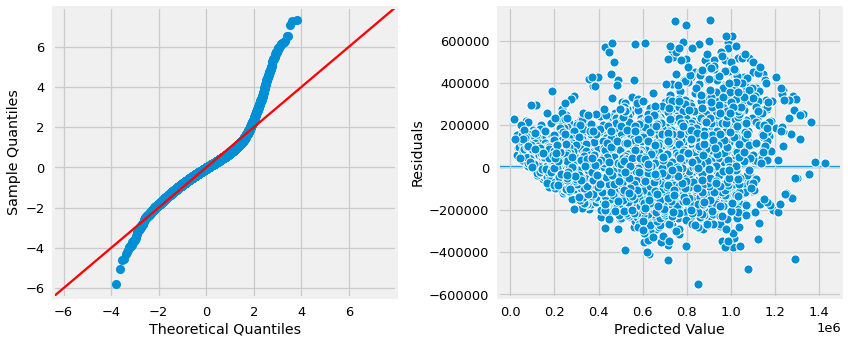

In [48]:
## instantiate an OLS model WITH the training data.
model_cln_scaled = sm.OLS(y_train_cln, X_train_scaled_df_cln)

## Fit the model and view the summary
result_cln_scaled = model_cln_scaled.fit()
sf.evaluate_ols(result_cln_scaled,X_train_scaled_df_cln, y_train_cln)

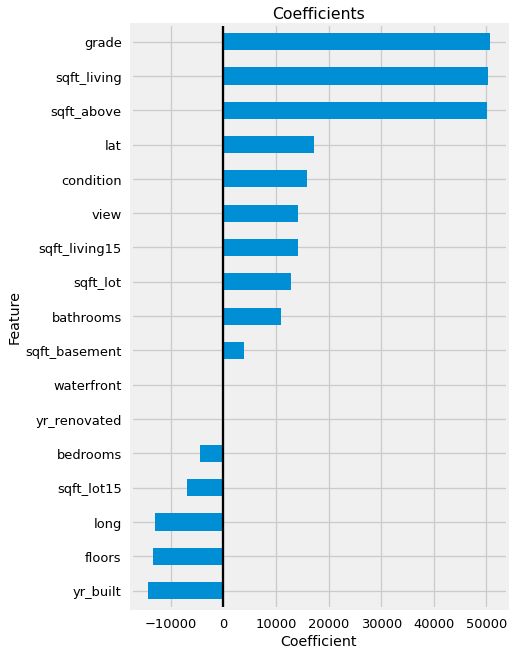

In [49]:
fig_scaled =sf.plot_coeffs(result_cln_scaled,ohe_cols,include_const=True)

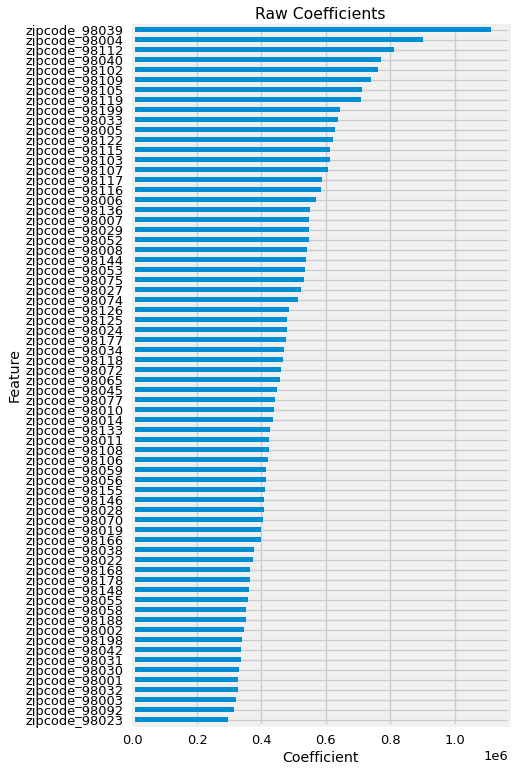

In [50]:
fig_scaled_zips =sf.plot_coeffs(result_cln_scaled, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

### Scaled Numeric - with Constant

In [51]:
X_train_scaled_df_cln_cnst.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04   
mean   2.269522e-16  1.904777e-16 -1.043575e-16 -2.064353e-17 -7.193574e-17   
std    1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min   -2.737005e+00 -2.222884e+00 -2.137715e+00 -8.144297e-01 -8.951943e-01   
25%   -3.803916e-01 -7.775766e-01 -7.457843e-01 -4.220039e-01 -8.951943e-01   
50%   -3.803916e-01 -5.492292e-02 -1.511730e-01 -2.139657e-01 -8.951943e-01   
75%    7.979150e-01  6.677308e-01  6.191189e-01  7.211733e-03  9.620640e-01   
max    3.154528e+00  3.197019e+00  3.781370e+00  1.115929e+01  2.819322e+00   

       waterfront          view     condition         grade    sqft_above  \
count     14026.0  1.402600e+04  1.402600e+04  1.402600e+04  1.402600e+04   
mean          0.0  2.127677e-17 -6.028418e-17  9.574546e-17  1.104366e-16   
std           0.0  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min           0.0 -2.260599e-01 -2.192729e+00 -2.465132e+00 -1.867119e+00   
25%           0.0 -2.260599e-01 -6.515005e-01 -5.203143e-01 -7.421956e-01   
50%           0.0 -2.260599e-01 -6.515005e-01 -5.203143e-01 -2.648063e-01   
75%           0.0 -2.260599e-01  8.897284e-01  4.520945e-01  5.655277e-01   
max           0.0  4.830905e+00  2.430957e+00  3.369321e+00  3.616882e+00   

       sqft_basement      yr_built  yr_renovated           lat          long  \
count   1.402600e+04  1.402600e+04       14026.0  1.402600e+04  1.402600e+04   
mean    8.004118e-17 -3.185436e-15           0.0  2.031273e-14 -2.339431e-14   
std     1.000036e+00  1.000036e+00           0.0  1.000036e+00  1.000036e+00   
min    -6.561916e-01 -2.473983e+00           0.0 -2.741890e+00 -2.188505e+00   
25%    -6.561916e-01 -6.459327e-01           0.0 -6.582541e-01 -8.440149e-01   
50%    -6.561916e-01  1.128806e-01           0.0  8.054811e-02 -1.134825e-01   
75%     6.352936e-01  8.716940e-01           0.0  8.607518e-01  6.714512e-01   
max     3.502391e+00  1.492541e+00           0.0  1.549587e+00  3.290488e+00   

       sqft_living15    sqft_lot15  zipcode_98001  zipcode_98002  \
count   1.402600e+04  1.402600e+04   14026.000000   14026.000000   
mean    2.836902e-17  2.380972e-17       0.017396       0.010409   
std     1.000036e+00  1.000036e+00       0.130747       0.101497   
min    -2.419371e+00 -9.527262e-01       0.000000       0.000000   
25%    -7.377196e-01 -4.587032e-01       0.000000       0.000000   
50%    -1.882691e-01 -1.811282e-01       0.000000       0.000000   
75%     5.776316e-01  6.491574e-02       0.000000       0.000000   
max     3.541334e+00  9.603089e+00       1.000000       1.000000   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.014758       0.011621       0.008056       0.020533   
std         0.120588       0.107178       0.089399       0.141821   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
count   14026.000000   14026.000000   14026.000000   14026.000000   
mean        0.007130       0.013404       0.003993       0.009411   
std         0.084139       0.115000       0.063063       0.096557   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98014  zipco

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     831.3
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:20:33   Log-Likelihood:            -1.8068e+05
No. Observations:               14026   AIC:                         3.615e+05
Df Residuals:                   13942   BIC:                         3.622e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -4406.0472   1074.389     -4.101      0.000   -6511.994   -2300.101
bathrooms        1.1e+04   1442.566      7.622      0.000    8167.690    1.38e+04
sqft_living    5.024e+04    962.063     52.217      0.000    4.84e+04    5.21e+04
sqft_lot       1.282e+04   1391.699      9.210      0.000    1.01e+04    1.55e+04
floors        -1.333e+04   1303.447    -10.229      0.000   -1.59e+04   -1.08e+04
waterfront    -8.091e-10   6.28e-11    -12.881      0.000   -9.32e-10   -6.86e-10
view           1.428e+04    850.662     16.787      0.000    1.26e+04    1.59e+04
condition        1.6e+04    936.410     17.081      0.000    1.42e+04    1.78e+04
grade           5.06e+04   1465.268     34.531      0.000    4.77e+04    5.35e+04
sqft_above     5.013e+04    981.880     51.058      0.000    4.82e+04    5.21e+04
sqft_basement  3930.1222    914.320      4.298      0.000    2137.933    5722.311
yr_built      -1.433e+04   1446.074     -9.910      0.000   -1.72e+04   -1.15e+04
yr_renovated  -5.435e-10   5.71e-11     -9.522      0.000   -6.55e-10   -4.32e-10
lat            1.731e+04   6922.473      2.500      0.012    3737.717    3.09e+04
long          -1.304e+04   6024.946     -2.164      0.030   -2.48e+04   -1230.437
sqft_living15  1.415e+04   1449.657      9.759      0.000    1.13e+04     1.7e+04
sqft_lot15    -6853.6778   1471.153     -4.659      0.000   -9737.336   -3970.020
zipcode_98001 -1.602e+05   1.42e+04    -11.308      0.000   -1.88e+05   -1.32e+05
zipcode_98002 -1.436e+05   1.44e+04     -9.945      0.000   -1.72e+05   -1.15e+05
zipcode_98003 -1.682e+05   1.48e+04    -11.386      0.000   -1.97e+05   -1.39e+05
zipcode_98004  4.149e+05   8149.677     50.906      0.000    3.99e+05    4.31e+05
zipcode_98005  1.387e+05   9711.806     14.280      0.000     1.2e+05    1.58e+05
zipcode_98006  8.094e+04   6507.139     12.438      0.000    6.82e+04    9.37e+04
zipcode_98007  5.993e+04   1.06e+04      5.667      0.000    3.92e+04    8.07e+04
zipcode_98008  5.455e+04   9034.699      6.038      0.000    3.68e+04    7.23e+04
zipcode_98010 -4.964e+04   1.85e+04     -2.684      0.007   -8.59e+04   -1.34e+04
zipcode_98011 -6.497e+04    1.3e+04     -5.005      0.000   -9.04e+04   -3.95e+04
zipcode_98014 -5.282e+04   2.11e+04     -2.505      0.012   -9.41e+04   -1.15e+04
zipcode_98019 -8.882e+04   1.79e+04     -4.967      0.000   -1.24e+05   -5.38e+04
zipcode_98022 -1.159e+05   2.07e+04     -5.608      0.000   -1.56e+05   -7.54e+04
zipcode_98023 -1.931e+05   1.57e+04    -12.271      0.000   -2.24e+05   -1.62e+05
zipcode_98024 -9038.2459   2.16e+04     -0.418      0.676   -5.14e+04    3.33e+04
zipcode_98027  3.543e+04   9635.416      3.677      0.000    1.65e+04    5.43e+04
zipcode_98028 -8.042e+04   1.18e+04     -6.792      0.000   -1.04e+05   -5.72e+04
zipcode_98029  5.933e+04   1.17e+04      5.085   

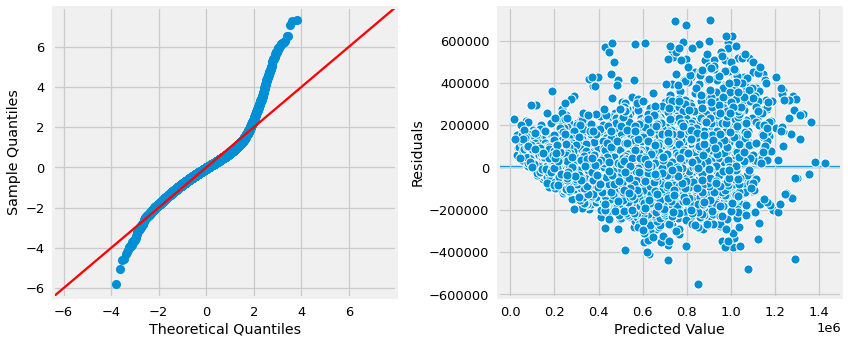

In [52]:
## instantiate an OLS model WITH the training data.
model_cln_scaled_cnst = sm.OLS(y_train_cln, X_train_scaled_df_cln_cnst)

## Fit the model and view the summary
result_cln_scaled_cnst = model_cln_scaled_cnst.fit()
sf.evaluate_ols(result_cln_scaled_cnst,X_train_scaled_df_cln_cnst, y_train_cln)

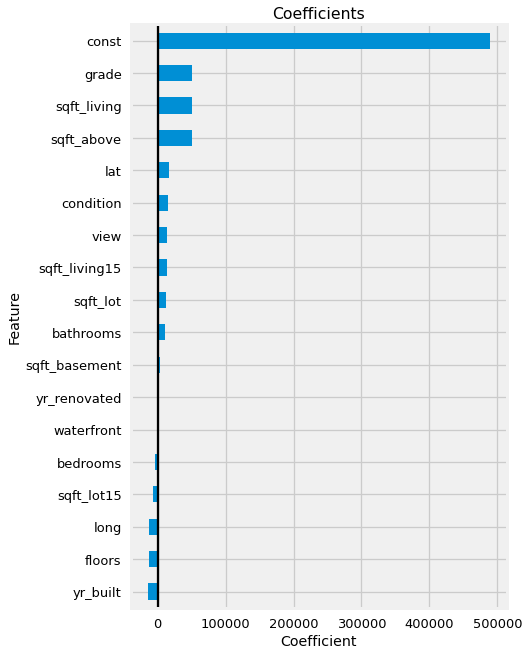

In [53]:
fig_scaled =sf.plot_coeffs(result_cln_scaled_cnst,ohe_cols,include_const=True)

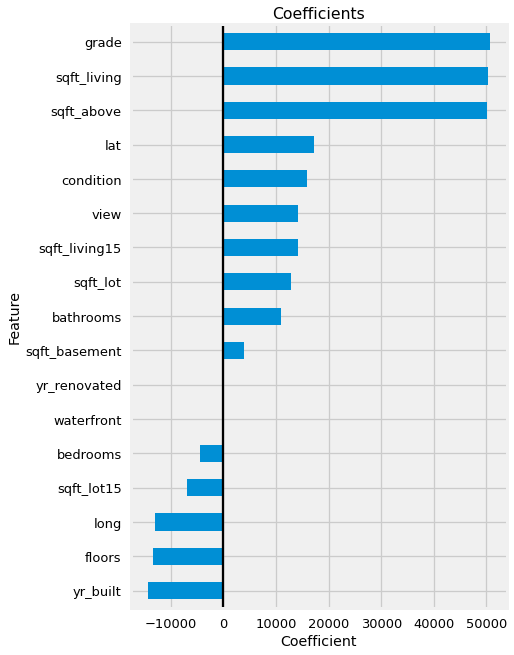

In [54]:
fig_scaled =sf.plot_coeffs(result_cln_scaled_cnst,ohe_cols,include_const=False)

# Adding Explanations

## Sklearn LinearRegression

> Pick 1 of the statsmodels models above to remake in sklearn for model explanations

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
## Making new var name sfor sklearn - update these to change model
ols_results = result_scaled_cnst
# sf.evaluate_ols(ols_results,X_tr,y_tr)
X_tr = X_train_scaled_df_cnst
X_te = X_test_scaled_df_cnst
y_tr = y_train
y_te = y_test

## If const in orig df, 
fit_intercept = 'const' in X_tr.columns

if fit_intercept==True:
    X_tr = X_tr.drop(columns='const')
    X_te = X_te.drop(columns='const')
fit_intercept

True

In [57]:
linreg = LinearRegression(fit_intercept=fit_intercept)
linreg.fit(X_tr, y_tr)
print(f"Train R^2: {format(linreg.score(X_tr,y_tr),'.2f')}")
print(f"Test R^2: {format(linreg.score(X_te,y_te),'.2f')}")
linreg.get_params()

Train R^2: 0.81
Test R^2: 0.80


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [58]:
coeffs = sf.get_coeffs(linreg,X_tr,name='LinReg Coeffs')
coeffs#.head(20)

bedrooms        -2.242426e+04
bathrooms        1.835863e+04
sqft_living     -6.498284e+16
sqft_lot         8.959473e+03
floors          -2.527070e+04
                     ...     
zipcode_98178    1.581407e+16
zipcode_98188    1.581407e+16
zipcode_98198    1.581407e+16
zipcode_98199    1.581407e+16
const           -1.581407e+16
Name: LinReg Coeffs, Length: 88, dtype: float64

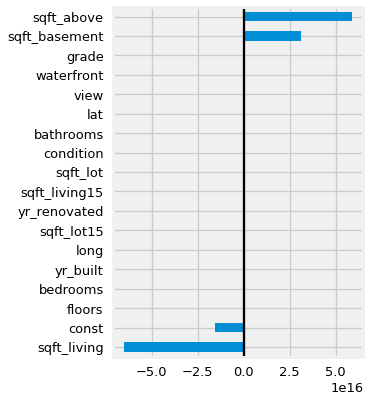

In [59]:
ax = coeffs.drop(ohe_cols).sort_values().plot(kind='barh',figsize=(4,6))
ax.axvline(0,color='black')

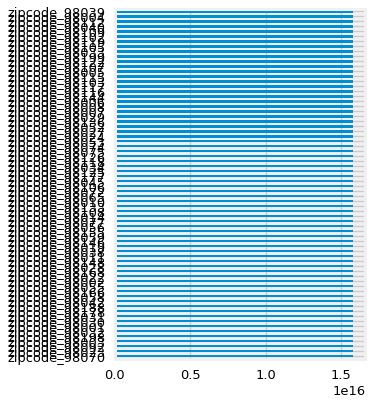

In [60]:
if len(ohe_cols)>1:

    ax = coeffs[ohe_cols].sort_values().plot(kind='barh',figsize=(4,6))
    ax.axvline(0,color='black')

In [61]:
## save 1 df of skelarn vs ols coeffs
compare_coeffs = pd.DataFrame({'OLS':ols_results.params,
                              'LinReg':coeffs}).round(2)
compare_coeffs['Agree?'] = compare_coeffs['OLS']==compare_coeffs['LinReg']

display(compare_coeffs.round(3))
compare_coeffs['Agree?'].value_counts(1)
#compare_coeffs.style.format({'OLS':"{:,.2f}","LinReg":"{:,.2f}"})

OLS        LinReg  Agree?
bedrooms       -22485.19 -2.242426e+04   False
bathrooms       18390.13  1.835863e+04   False
sqft_living     86739.13 -6.498284e+16   False
sqft_lot         8979.06  8.959470e+03   False
floors         -25330.29 -2.527070e+04   False
...                  ...           ...     ...
zipcode_98178 -150449.31  1.581407e+16   False
zipcode_98188 -147577.32  1.581407e+16   False
zipcode_98198 -177754.95  1.581407e+16   False
zipcode_98199  157143.38  1.581407e+16   False
const          548448.02 -1.581407e+16   False

[88 rows x 3 columns]

False    1.0
Name: Agree?, dtype: float64

In [62]:
compare_coeffs[compare_coeffs['Agree?']==True]

Empty DataFrame
Columns: [OLS, LinReg, Agree?]
Index: []

In [63]:
# compare_coeffs[compare_coeffs['Agree?']==False]

In [64]:
compare_coeffs.style.bar()

> ISSUE WITH COEFFICIENTS NOT MATCHING - SEE IF TRUE FOR OTHER DATASETS. 

### Shap

In [65]:
import shap
shap.initjs()

shap.__version__

'0.41.0'

In [66]:
## sampling 200 rows from training data
X_shap = shap.sample(X_tr,nsamples=200,random_state=321)

In [67]:
## Creating explainer from model and getting shap values
explainer = shap.LinearExplainer(linreg,X_shap)
shap_values = explainer(X_shap)
shap_values.shape

(200, 87)

In [68]:
# [i for i in dir(shap_values) if not i.startswith("_")]

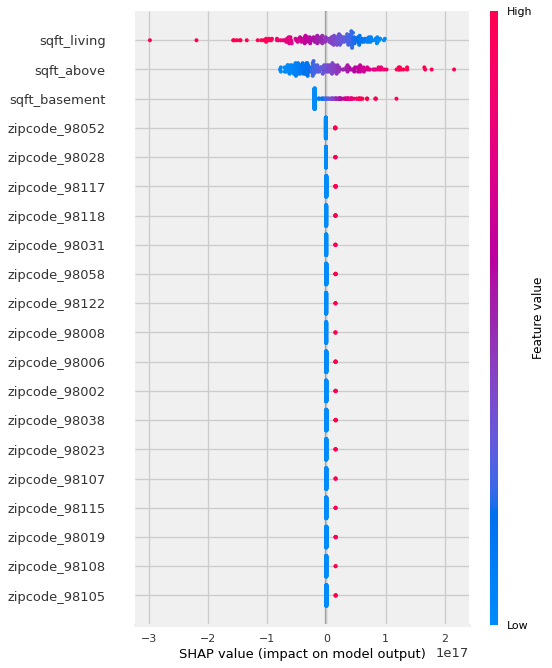

In [69]:
shap.summary_plot(shap_values)

In [70]:
explainer.expected_value

516714.0

In [71]:
shap.force_plot(explainer.expected_value,shap_values= shap_values.values, features=X_shap)       

## RandomForest

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_tr,y_tr)

RandomForestRegressor()

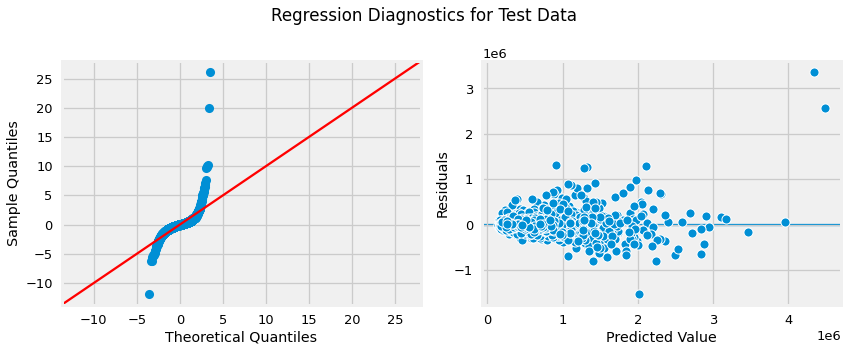

Score
Metric Split           
R^2    Train       0.98
       Test        0.87
RMSE   Train   48093.39
       Test   128866.68

In [73]:
scores = sf.evaluate_regression(rf_reg,X_te, y_te, X_train_df=X_tr, y_train=y_tr,
                            return_scores=True)

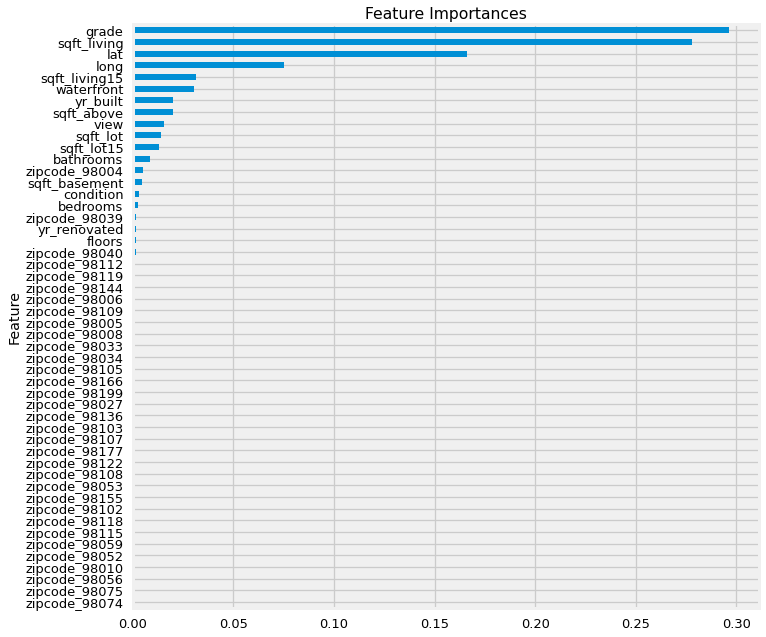

In [74]:
importances = sf.get_importance(rf_reg,X_test_df,top_n=50)

### Permutation Importance

In [75]:
from sklearn.inspection import permutation_importance
## Permutation importance takes a fit mode and test data. 
r = permutation_importance(linreg, X_tr, y_tr,
#                            n_repeats=30
                          )
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [76]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_tr.columns,
                           name = 'permutation importance')
permutation_importances

bedrooms         7.402601e-03
bathrooms        4.775955e-03
sqft_living      6.212351e+22
sqft_lot         1.189966e-03
floors           9.800424e-03
                     ...     
zipcode_98177    4.367865e+19
zipcode_98178    4.263327e+19
zipcode_98188    2.395281e+19
zipcode_98198    4.722384e+19
zipcode_98199    5.295070e+19
Name: permutation importance, Length: 87, dtype: float64

<AxesSubplot:>

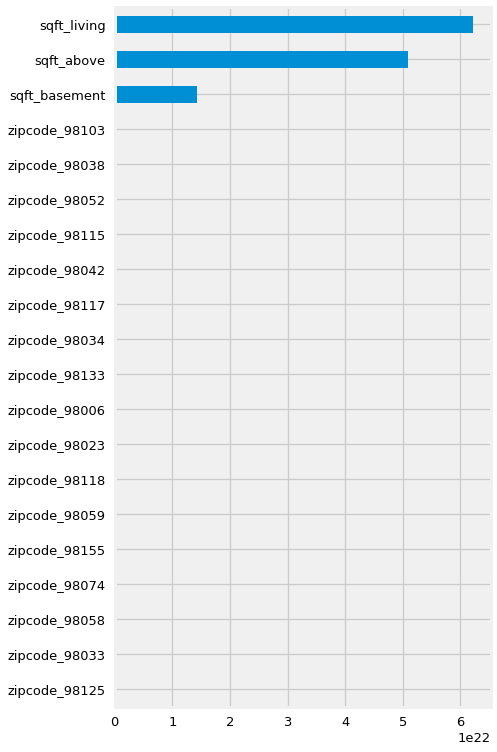

In [77]:
permutation_importances.sort_values().tail(20).plot(kind='barh',figsize=(6,12))

In [78]:
X_shap = shap.sample(X_tr,nsamples=200,random_state=321)

In [79]:
explainer = shap.TreeExplainer(rf_reg,X_shap)
shap_values = explainer(X_shap)

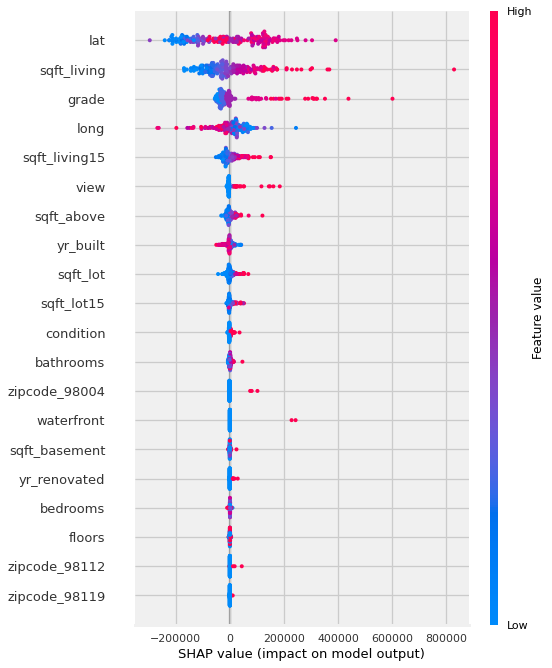

In [80]:
shap.summary_plot(shap_values)

In [81]:
shap.force_plot(explainer.expected_value,shap_values= shap_values.values, features=X_shap)       